<h1 style='text-align:center;border:10px double;border-color:gray;'>
    <br/>
     PROJET 3<br/>
    <br/>
    <font color = 'Navy'>"Concevez une application au service de la santé publique"</font>
    <br/>
    <br/>
    
</h1>
<h4 style='text-align:left;border-color:gray;'>
    <br/>
    <font color = 'Navy'>* notebook du nettoyage</font>
    <br/>
</h4>

 Dirigé par :   [Pouria Forouzesh](https://www.linkedin.com/in/pouria-forouzesh/)

## Rappel du contexte :
L'agence "Santé publique France" a lancé **un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation**. Vous souhaitez y participer et proposer une idée d’application.

![texte alternatif](photo.png)

**Les données**

Extrait de l’appel à projets :

Le jeu de données Open Food Facts est disponible sur [le site officiel](https://world.openfoodfacts.org/). Les variables sont définies à [cette adresse](https://world.openfoodfacts.org/data/data-fields.txt).

Les champs sont séparés en quatre sections :

- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

**Votre mission**

`1)` **Traiter le jeu de données**, en :

- **Réfléchissant à une idée d’application**.
- **Repérant des variables pertinentes** pour les traitements à venir, et nécessaires pour votre idée d’application.
- **Nettoyant les données** en :
 - mettant en évidence les éventuelles **valeurs manquantes**, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
 - identifiant et en quantifiant les éventuelles **valeurs aberrantes** de chaque variable.
- **Automatisant ces traitements** pour éviter de répéter ces opérations


`2)` Tout au long de l’analyse, **produire des visualisations** afin de mieux comprendre les données. **Effectuer une analyse univariée** pour chaque variable intéressante, afin de synthétiser son comportement.

`3)` **Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés** pour vérifier la significativité des résultats.

`4)` **Justifier votre idée d’application**. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

`5)` **Rédiger un rapport d’exploration** et **pitcher votre idée** durant la soutenance du projet.

<a id='sommaire'></a>

### Table de matière

**[`Importation des bibliothèques et chargement des données`](#p1)**
* [Importation de packages et de modules](#1)  
* [Importation le jeu de données](#2)  
* [Premier aperçu](#3) 

    
**[`Feature engineering Feature selection`](#p2)**
* [Vérificaion de la qualité des données: nombre et du pourcentage des valeurs manquantes](#4)  
* [Traitement des colones ayant un pourcentage élevé des NAN](#5)
* [Correction des types de données](#6)
* [Traitement des colones non pertinents à l étude](#7)
* [Traitement des colones dates](#8)
* [Filtrage de la zone d étdues](#9)
* [Traitement des colonnes contenant des informations redondantes](#10)
* [Traitement des valeurs négatives](#11)
* [Traitement des colones _100g](#12)
* [Traitement des outliers (atypiques et aberrants)](#13)
* [Traitement des valeurs manquantes](#14)
    


**[`Automatisation du processus de nettoyage`](#p3)**


**[`Sauvegarde de la df en fichier CSV`](#p4)**


## <div style='background-color: #aac1cb ; padding: 5px; border: 2px solid black;'> 0. Importation des bibliothèques et chargement des données </div>  

### 0.0 Importation de packages et de modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
import seaborn as sns 
import missingno as msno

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_colwidth', -1)
plt.rcParams.update({'font.size':15})

from ipywidgets import interact, interact_manual
from P3_DS_Toolbox import *

### 0.1 Importation le jeu de données

In [2]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv', header=0, sep='\t',low_memory=False, encoding ='utf-8')
df_auto = df.copy()
print(f"shape {df.shape}")
print_null_pct(df)

shape (320772, 162)
nb de null:  39608589 
pct de null:  76.2


In [3]:
df.head(1)

code  \
0  0000000003087   

                                                                                          url  \
0  http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   

  last_modified_t last_modified_datetime        product_name generic_name  \
0  1474103893      2016-09-17T09:18:13Z   Farine de blé noir  NaN           

  quantity packaging packaging_tags           brands      brands_tags  \
0  1kg      NaN       NaN            Ferme t'y R'nao  ferme-t-y-r-nao   

  categories categories_tags categories_fr origins origins_tags  \
0  NaN        NaN             NaN           NaN     NaN           

  manufacturing_places manufacturing_places_tags labels labels_tags labels_fr  \
0  NaN                  NaN                       NaN    NaN         NaN        

  emb_codes emb_codes_tags first_packaging_code_geo cities cities_tags  \
0  NaN       NaN            NaN                      NaN    NaN          

  purchase_places stores countries countries_tags countries_fr  \
0  NaN             NaN    en:FR     en:france      France        

  ingredients_text allergens allergens_fr traces traces_tags traces_fr  \
0  NaN              NaN       NaN          NaN    NaN         NaN        

  serving_size  no_nutriments  additives_n additives additives_tags  \
0  NaN         NaN            NaN           NaN       NaN             

  additives_fr  ingredients_from_palm_oil_n  ingredients_from_palm_oil  \
0  NaN         NaN                          NaN                          

  ingredients_from_palm_oil_tags  ingredients_that_may_be_from_palm_oil_n  \
0  NaN                           NaN                                        

   ingredients_that_may_be_from_palm_oil  \
0 NaN                                      

  ingredients_that_may_be_from_palm_oil_tags  nutrition_grade_uk  \
0  NaN                                       NaN                   

  nutrition_grade_fr pnns_groups_1 pnns_groups_2  \
0  NaN                NaN           NaN            

                                                                                                                                                                                                                                                                                                                                              states  \
0  en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded   

                                                                                                                                                                                                                                                                                                                              states_tags  \
0  en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded   

                                                                                                                                                                                                                                                                       states_fr  \
0  A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Qua

In [4]:
nombre_percentage_nan(df)

Nombre total des NaN: 39608589
Percentage total des NaN: 76.22


In [5]:
#df.dtypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


<a id='3'></a>

### 0.2  Premier aperçu

[Haut de page](#sommaire)

In [7]:
df_sh = df.shape

# Description générale
desc = df.describe(include='all')

#Types et contenu des colonnes
desc_type = pd.DataFrame(df.dtypes, columns=['type']).T
nb_null = (df_sh[0]-desc.loc["count"].T)
pct_null = (df_sh[0]-desc.loc["count"].T)*100/df_sh[0]
desc_null = pd.DataFrame([nb_null, pct_null], index=['nb null','pct null'])

# Concatenate general, type and null stats
desc = pd.concat([desc_type, desc_null, desc])
desc

code  \
type      object          
nb null   23.0            
pct null  0.00717         
count     320749          
unique    320749          
top       0000000003087   
freq      1               
mean      NaN             
std       NaN             
min       NaN             
25%       NaN             
50%       NaN             
75%       NaN             
max       NaN             

                                                                                                 url  \
type      object                                                                                       
nb null   23.0                                                                                         
pct null  0.00717                                                                                      
count     320749                                                                                       
unique    320749                                                                                       
top       http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao   
freq      1                                                                                            
mean      NaN                                                                                          
std       NaN                                                                                          
min       NaN                                                                                          
25%       NaN                                                                                          
50%       NaN                                                                                          
75%       NaN                                                                                          
max       NaN                                                                                          

                  creator   created_t      created_datetime last_modified_t  \
type      object           object      object                object           
nb null   2.0              3.0         9.0                   0.0              
pct null  0.000623         0.000935    0.002806              0.0              
count     320770           320769      320763                320772           
unique    3535             189567      189568                180495           
top       usda-ndb-import  1489077120  2017-03-09T10:37:09Z  1439141742       
freq      169868           20          20                    33               
mean      NaN              NaN         NaN                   NaN              
std       NaN              NaN         NaN                   NaN              
min       NaN              NaN         NaN                   NaN              
25%       NaN              NaN         NaN                   NaN              
50%       NaN              NaN         NaN                   NaN              
75%       NaN              NaN         NaN                   NaN              
max       NaN              NaN         NaN                   NaN              

         last_modified_datetime product_name  \
type      object                 object        
nb null   0.0                    17762.0       
pct null  0.0                    5.537266      
count     320772                 303010        
unique    180495                 221347        
top       2015-08-09T17:35:42Z   Ice Cream     
freq      33                     410           
mean      NaN                    NaN           
std       NaN                    NaN           
min       NaN                    NaN           
25%       NaN                    NaN           
50%       NaN                    NaN           
75%       NaN                    NaN           
max       NaN                    NaN           

                                                 generic_name   quantity  \
type      object                                               object

Les valeurs manquantes dans chaque colonne :

+--------------------------------------------+-----------+-----------+----------------------+------------------+---------+
|                                            | Count_NaN | %_NaN_col | Total_NaN_in_dataset | %_NaN_in_dataset |  Types  |
+--------------------------------------------+-----------+-----------+----------------------+------------------+---------+
|            water-hardness_100g             |  320772   |   100.0   |       39608589       |      76.22       | float64 |
|               no_nutriments                |  320772   |   100.0   |       39608589       |      76.22       | float64 |
|   ingredients_that_may_be_from_palm_oil    |  320772   |   100.0   |       39608589       |      76.22       | float64 |
|             nutrition_grade_uk             |  320772   |   100.0   |       39608589       |      76.22       | float64 |
|             nervonic-acid_100g             |  320772   |   100.0   |       39608589       |

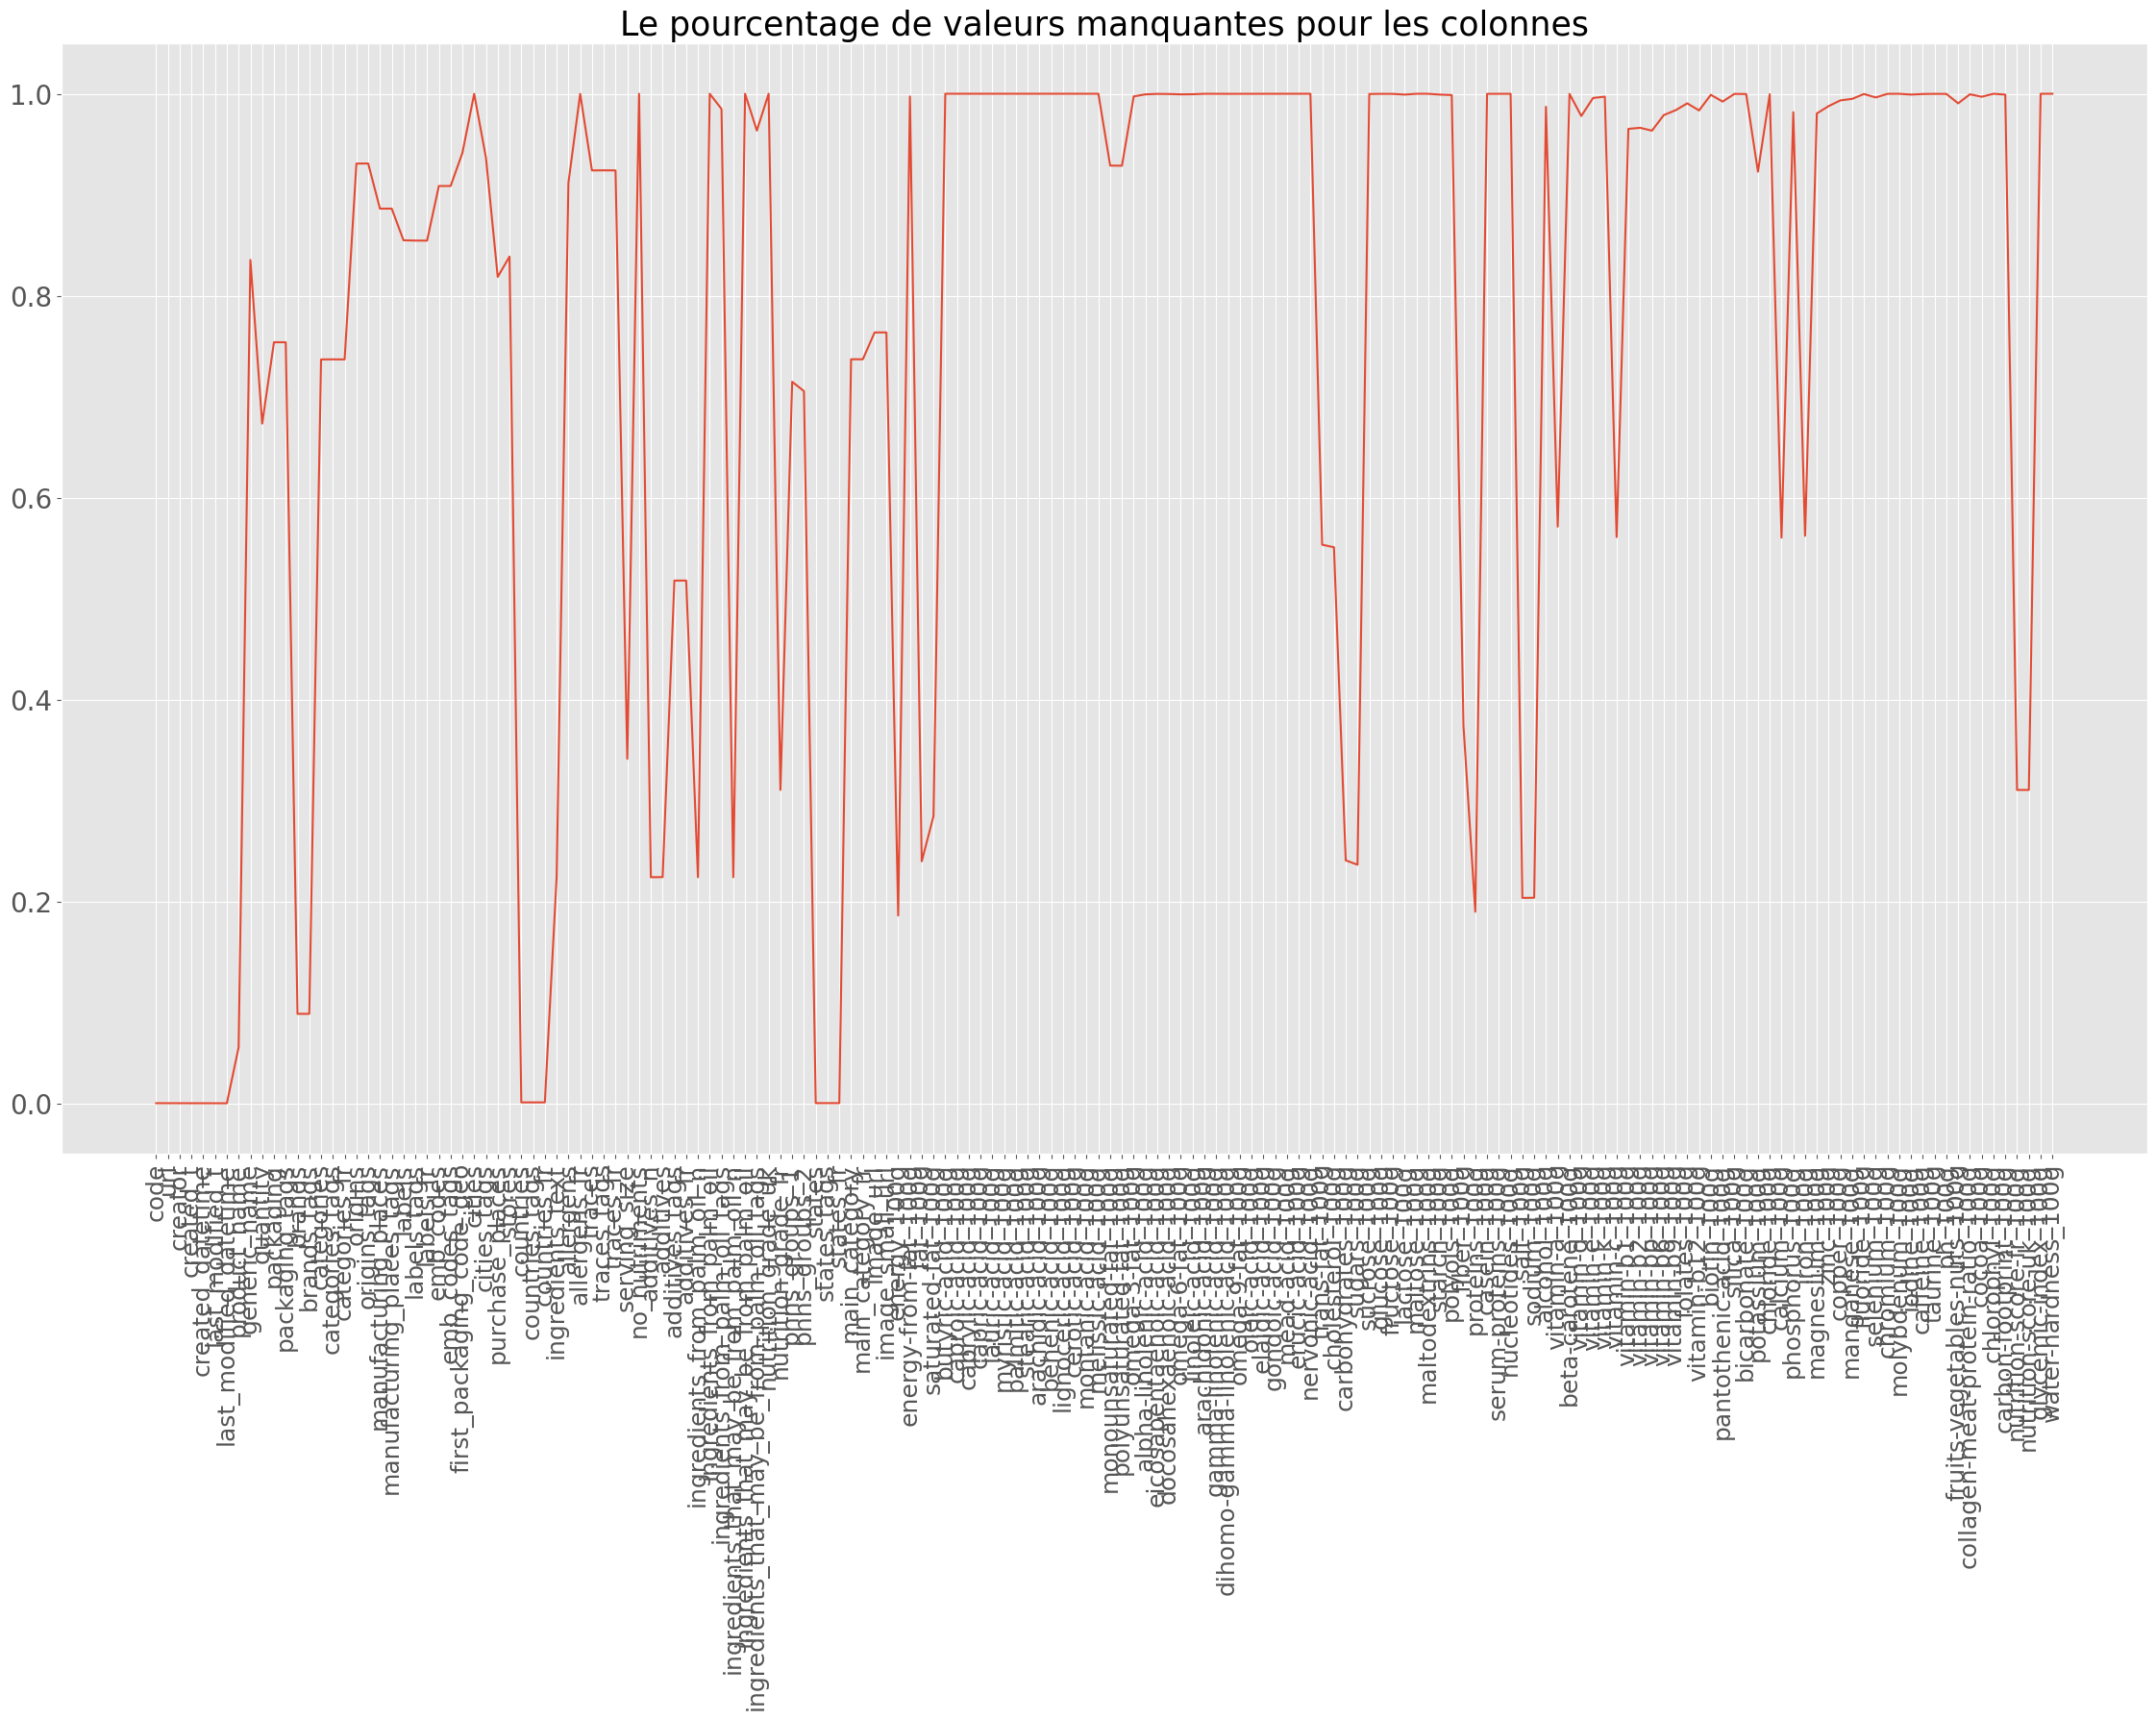


----------------------------------------------------------------------------------



In [8]:
NaN_columns_df(df)

In [9]:
# Checking Colonnes 

for i, c in enumerate(df.columns):
    print('\n'+c if i % 6 == 0 else c, end='   |   ')


code   |   url   |   creator   |   created_t   |   created_datetime   |   last_modified_t   |   
last_modified_datetime   |   product_name   |   generic_name   |   quantity   |   packaging   |   packaging_tags   |   
brands   |   brands_tags   |   categories   |   categories_tags   |   categories_fr   |   origins   |   
origins_tags   |   manufacturing_places   |   manufacturing_places_tags   |   labels   |   labels_tags   |   labels_fr   |   
emb_codes   |   emb_codes_tags   |   first_packaging_code_geo   |   cities   |   cities_tags   |   purchase_places   |   
stores   |   countries   |   countries_tags   |   countries_fr   |   ingredients_text   |   allergens   |   
allergens_fr   |   traces   |   traces_tags   |   traces_fr   |   serving_size   |   no_nutriments   |   
additives_n   |   additives   |   additives_tags   |   additives_fr   |   ingredients_from_palm_oil_n   |   ingredients_from_palm_oil   |   
ingredients_from_palm_oil_tags   |   ingredients_that_may_be_from_palm_oi

In [10]:
#Fonction pour réduire la mémoire du df
#reduce_memory_usage(df, verbose=True)

In [11]:
#df.info()

In [12]:
print_null_pct(df)

nb de null:  39608589 
pct de null:  76.2


In [13]:
# fonction pour détecter NaN dans les colonnes
#NaN_columns_df(df)

In [14]:
# fonction pour detecter les doublons dans plusieurs df
detecte_doublons(df)

Les doublons dans df_fusion : 0


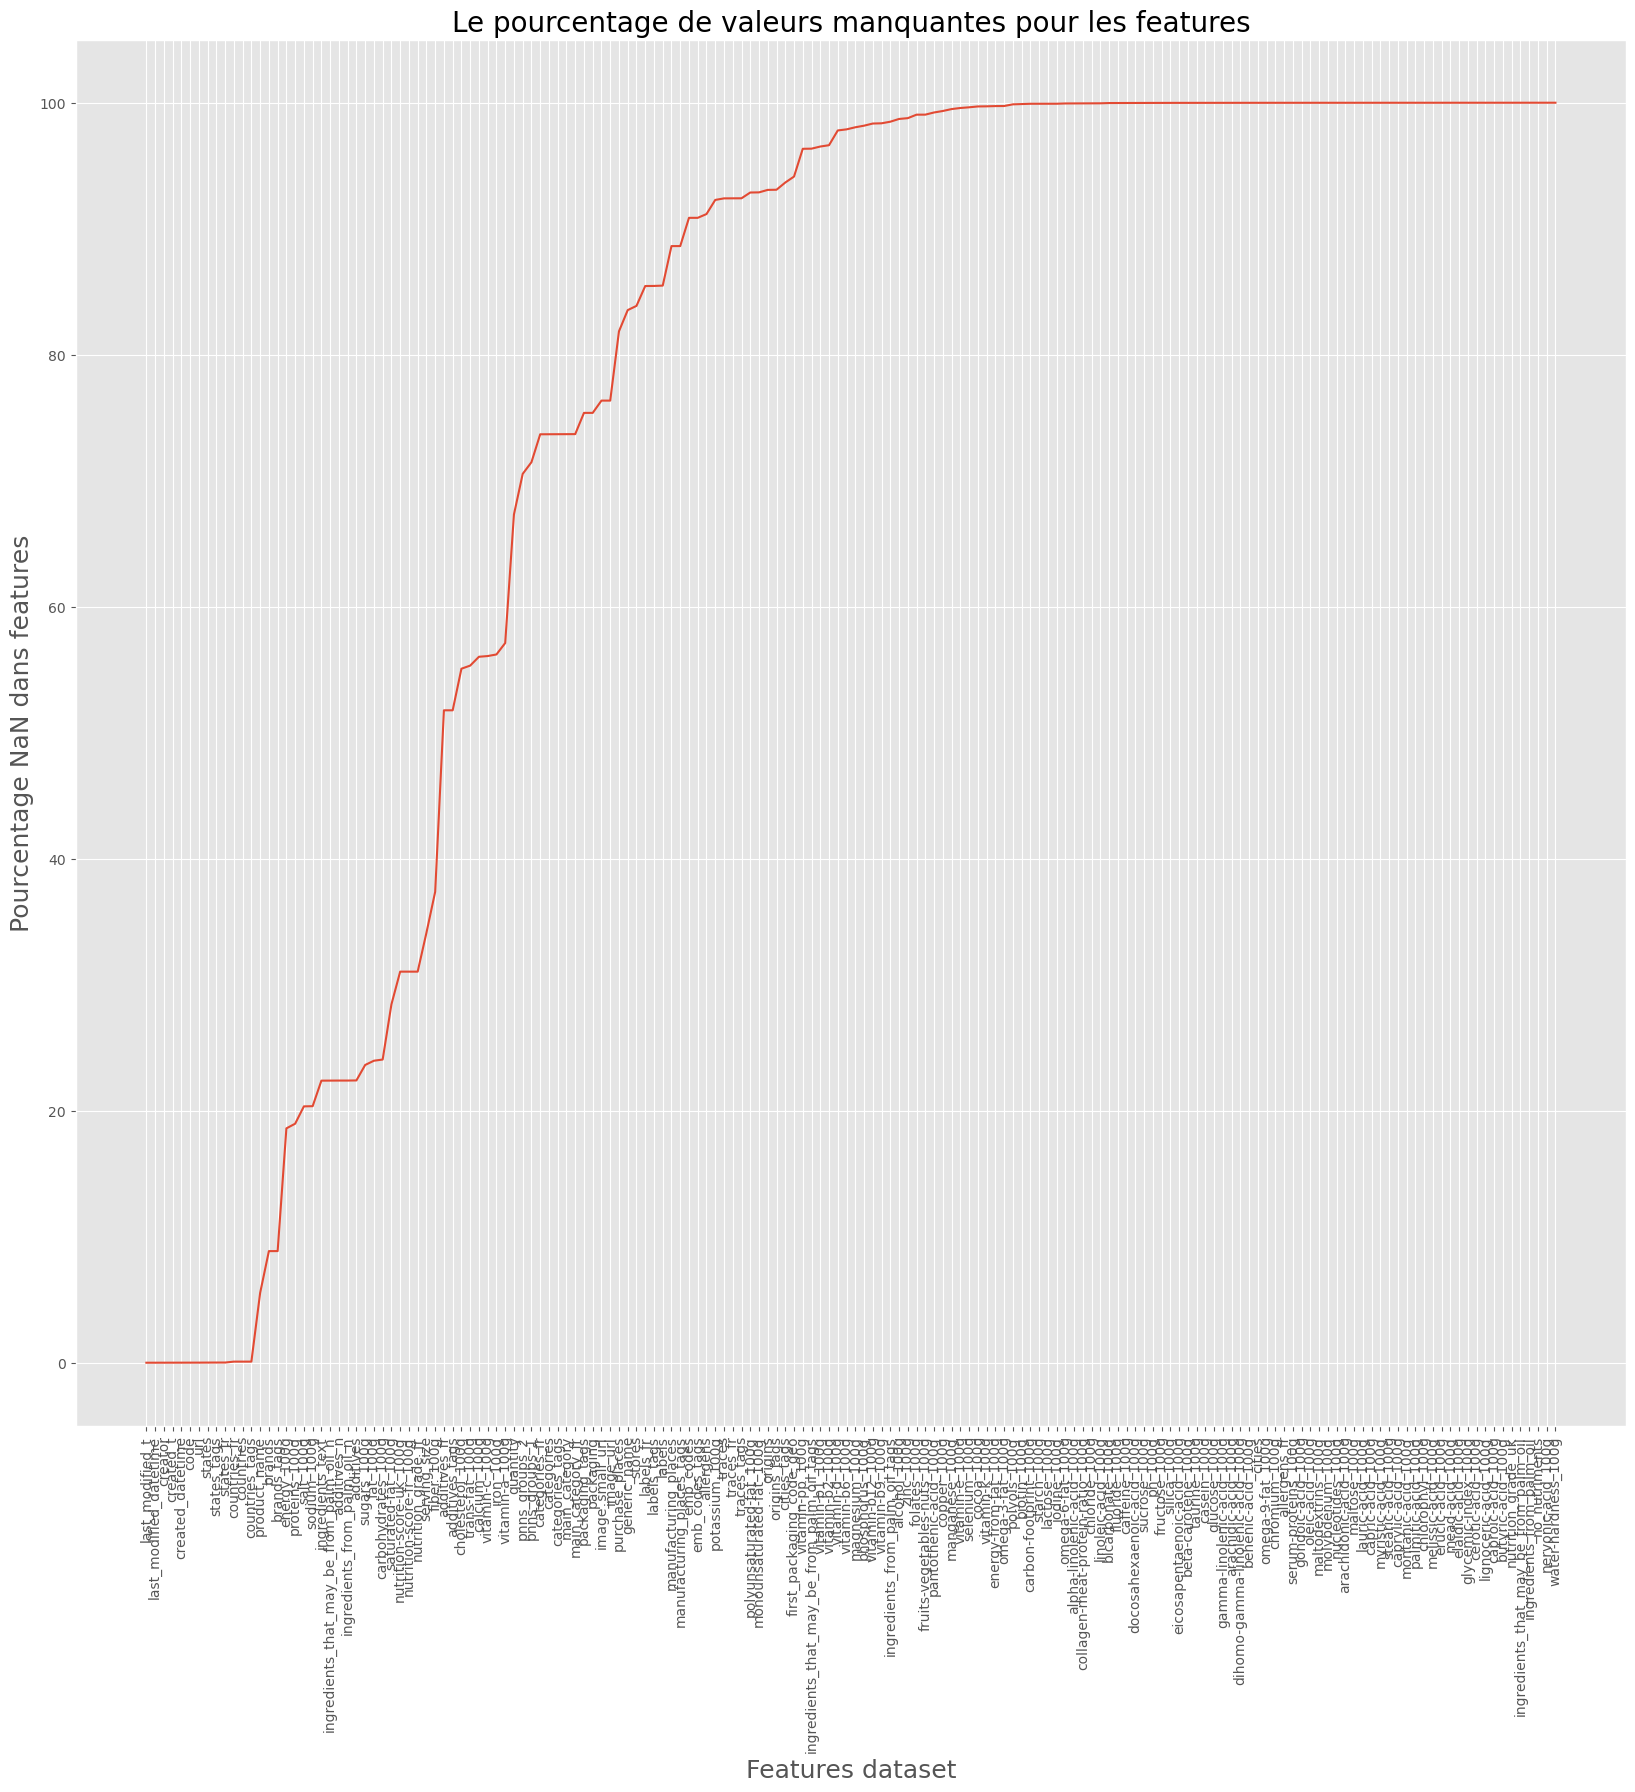

In [15]:
# Fonction pour voir les valeurs manquantes pour chaque colonne
plot_pourcentage_NaN_features(df)

In [16]:

def plot_export_missing(df, cols, n_file, title,
                        shorten_label=False, figsize=(12,8)):
    '''Affichage du nombre de valeurs manquantes par colonne
    '''
    with plt.style.context('default'):
        fig, axs = plt.subplots(2,1)
        msno.matrix(df[cols] , sparkline=False,
                    fontsize=11, ax=axs[0])
        msno.bar(df[cols], ax=axs[1], fontsize=11)
        if shorten_label:
            for ax in axs:
                lab = [item.get_text() for item in ax.get_xticklabels()]
                short_lab = [s[:7]+'...'+s[-7:] if len(s)>14 else s for s in lab]
                ax.axes.set_xticklabels(short_lab)
    fig.set_size_inches(figsize)
    [ax.grid() for ax in axs.flatten()];
    [sns.despine(ax=ax, right=False, left=False,top=False, bottom=False)\
                                        for ax in axs.flatten()];
    plt.subplots_adjust(hspace=0.3)
    plt.tight_layout(rect=[0, 0.05, 1, 0.92])
    fig.suptitle(title, fontweight='bold', fontsize=14)
    if not os.path.exists(os.getcwd()+'/FIG'):
        os.makedirs('FIG')
    plt.savefig(os.getcwd()+'/FIG/'+n_file, dpi=400);
    plt.show()    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

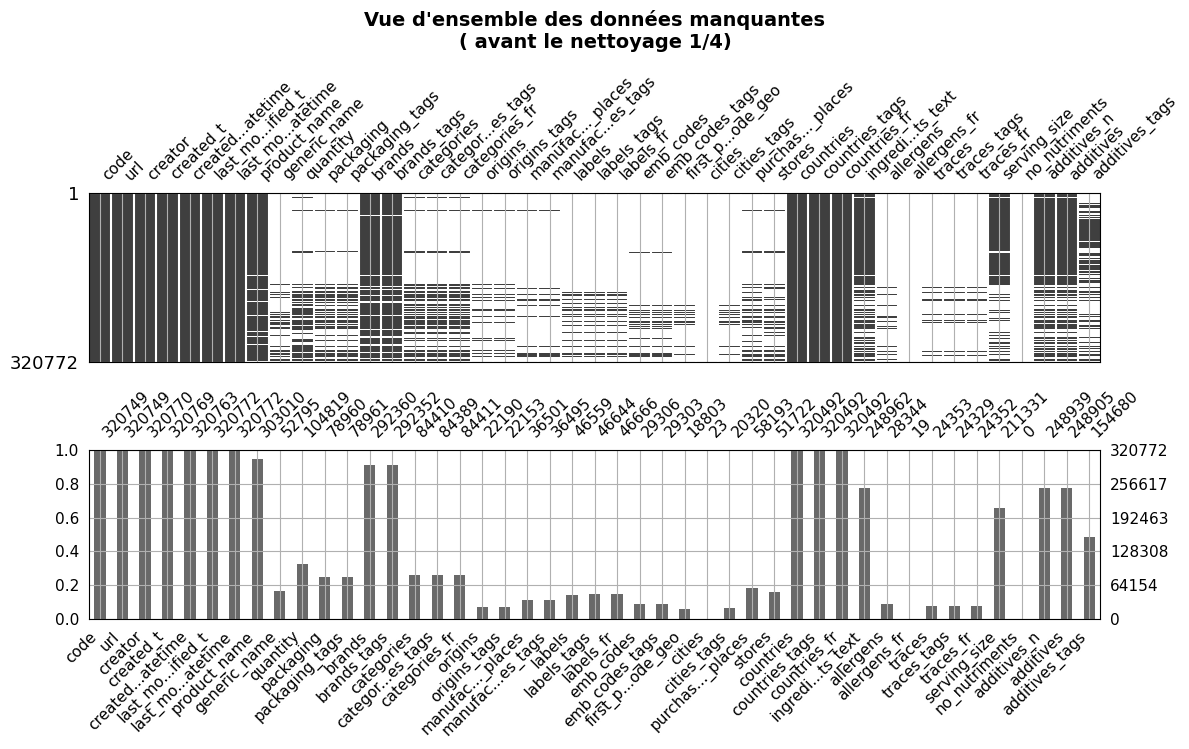

In [17]:
plot_export_missing(df, df.columns[0:45], 'C_0_3_missing_vals_1.png',
                    "Vue d'ensemble des données manquantes\n( avant le nettoyage 1/4)",
                    shorten_label=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

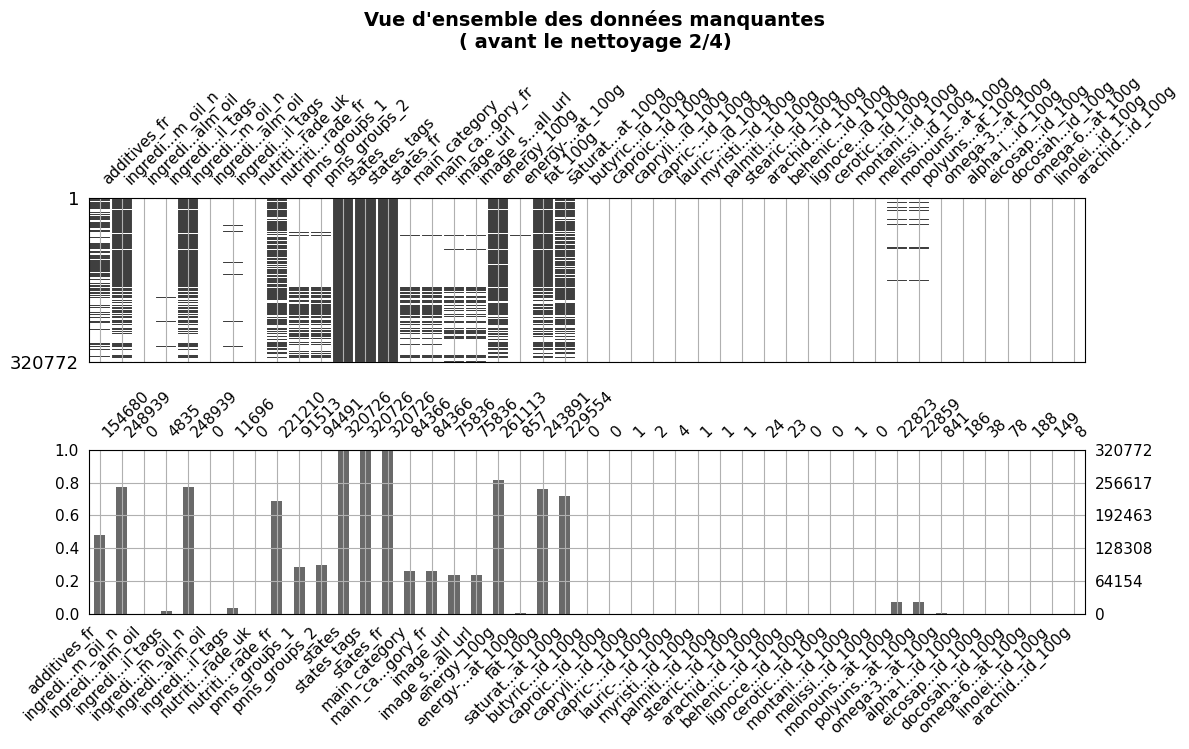

In [18]:
plot_export_missing(df, df.columns[45:90], 'C_0_3_missing_vals_2.png',
                    "Vue d'ensemble des données manquantes\n( avant le nettoyage 2/4)",
                    shorten_label=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

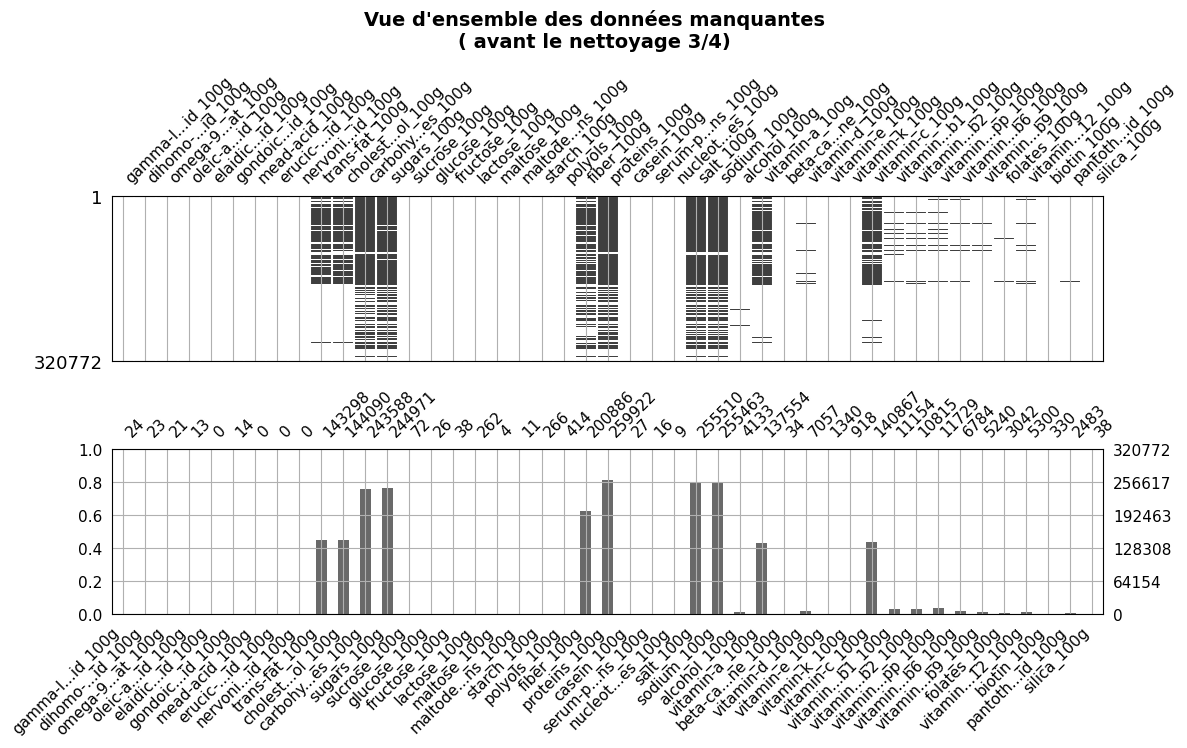

In [19]:
plot_export_missing(df, df.columns[90:135], 'C_0_3_missing_vals_3.png',
                    "Vue d'ensemble des données manquantes\n( avant le nettoyage 3/4)",
                    shorten_label=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

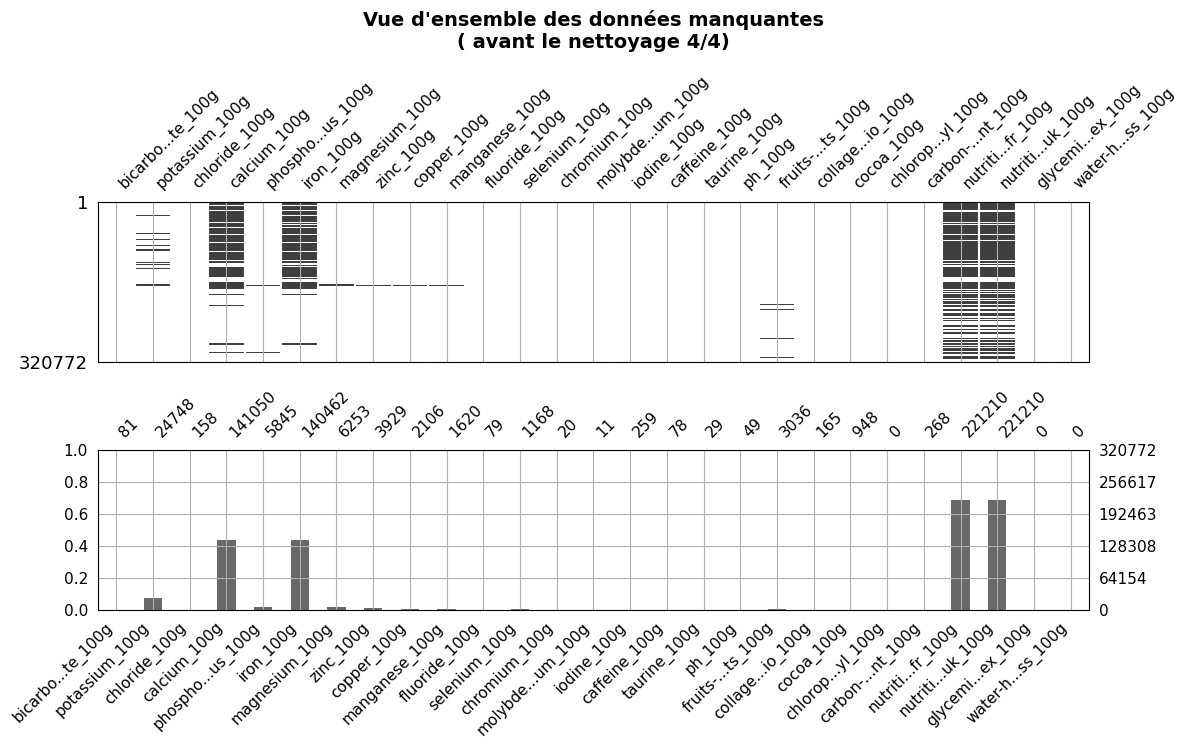

In [20]:
plot_export_missing(df, df.columns[135:166],'C_0_3_missing_vals_4.png',
                    "Vue d'ensemble des données manquantes\n( avant le nettoyage 4/4)",
                    shorten_label=True)

**Upload le dataset** 

<font color=blue>Inspection de base </font>

- [X] Upload le fichier openfoodfacts produits 

> L'encodage du fichier est Unicode UTF-8. Le caractère qui sépare les champs est <tab> (tabulation).

- [X] Les dimensions du dataset : 

> (320772, 162)

- [X] Le types des colonnes du dataset : 

> dtypes: float64(106), object(56)

- [X] Memory usage dataset 

- > memory usage avant: 396.5+ MB


<a id='p2'></a>

## <div style='background-color: #aac1cb ; padding: 5px; border: 2px solid black;'> 1 Feature selection </div>  


[Haut de page](#sommaire)

<a id='4'></a>

### 1.1  Vérificaion de la qualité des données: nombre et du pourcentage des valeurs manquantes

In [21]:
data_missing= pd.DataFrame((((df.isnull().sum()/len(df))*100 ).sort_values(ascending=False)))
data_missing= data_missing.reset_index()
data_missing.rename(columns = {0:'% of Total Values'} , inplace= True)
data_missing

index  % of Total Values
0    water-hardness_100g                         100.000000       
1    no_nutriments                               100.000000       
2    ingredients_that_may_be_from_palm_oil       100.000000       
3    nutrition_grade_uk                          100.000000       
4    nervonic-acid_100g                          100.000000       
5    erucic-acid_100g                            100.000000       
6    mead-acid_100g                              100.000000       
7    elaidic-acid_100g                           100.000000       
8    butyric-acid_100g                           100.000000       
9    caproic-acid_100g                           100.000000       
10   ingredients_from_palm_oil                   100.000000       
11   lignoceric-acid_100g                        100.000000       
12   cerotic-acid_100g                           100.000000       
13   melissic-acid_100g                          100.000000       
14   chlorophyl_100g                             100.000000       
15   glycemic-index_100g                         100.000000       
16   myristic-acid_100g                          99.999688        
17   palmitic-acid_100g                          99.999688        
18   caprylic-acid_100g                          99.999688        
19   stearic-acid_100g                           99.999688        
20   montanic-acid_100g                          99.999688        
21   capric-acid_100g                            99.999377        
22   maltose_100g                                99.998753        
23   lauric-acid_100g                            99.998753        
24   arachidonic-acid_100g                       99.997506        
25   nucleotides_100g                            99.997194        
26   maltodextrins_100g                          99.996571        
27   molybdenum_100g                             99.996571        
28   oleic-acid_100g                             99.995947        
29   gondoic-acid_100g                           99.995636        
30   serum-proteins_100g                         99.995012        
31   allergens_fr                                99.994077        
32   chromium_100g                               99.993765        
33   omega-9-fat_100g                            99.993453        
34   behenic-acid_100g                           99.992830        
35   cities                                      99.992830        
36   dihomo-gamma-linolenic-acid_100g            99.992830        
37   gamma-linolenic-acid_100g                   99.992518        
38   arachidic-acid_100g                         99.992518        
39   glucose_100g                                99.991895        
40   casein_100g                                 99.991583        
41   taurine_100g                                99.990959        
42   beta-carotene_100g                          99.989401        
43   eicosapentaenoic-acid_100g                  99.988154        
44   fructose_100g                               99.988154        
45   silica_100g                                 99.988154        
46   ph_100g                                     99.984724        
47   sucrose_100g                                99.977554        
48   caffeine_100g                               99.975684        
49   docosahexaenoic-acid_100g                   99.975684        
50   fluoride_100g                               99.975372        
51   bicarbonate_100g                            99.974748        
52   linoleic-acid_100g                          99.953550        
53   chloride_100g                               99.950744        
54   collagen-meat-protein-ratio_100g            99.948562        
55   alpha-linolenic-acid_100g                   99.942015        
56   omega-6-fat_100g                            99.941391        
57   iodine_100g                                 99.919257        
58   lactose_100g                                99.918322        
59   starch_100g      

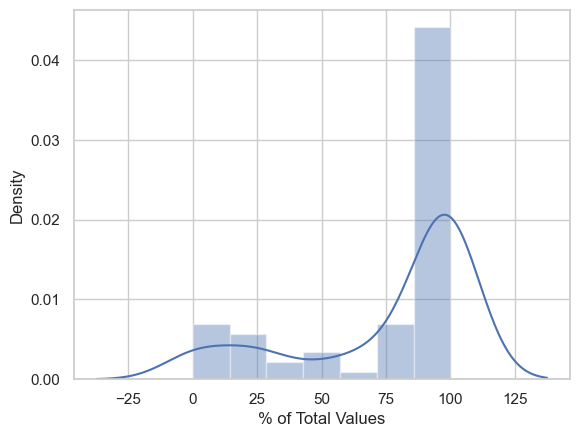

In [22]:
sns.set(style="whitegrid")
sns.distplot(data_missing['% of Total Values'])
plt.show()

* Le jeu de données contient beaucoup de valeurs manquantes : 76.22 % .
* des colones vides : (100 % de valeurs manquantes).
* La distribution des valeurs manquantes montre une répartion des NAN dans l'intervalle 50% et 100 % .
* La figure  montre le pourcentage des NAN par colones  :

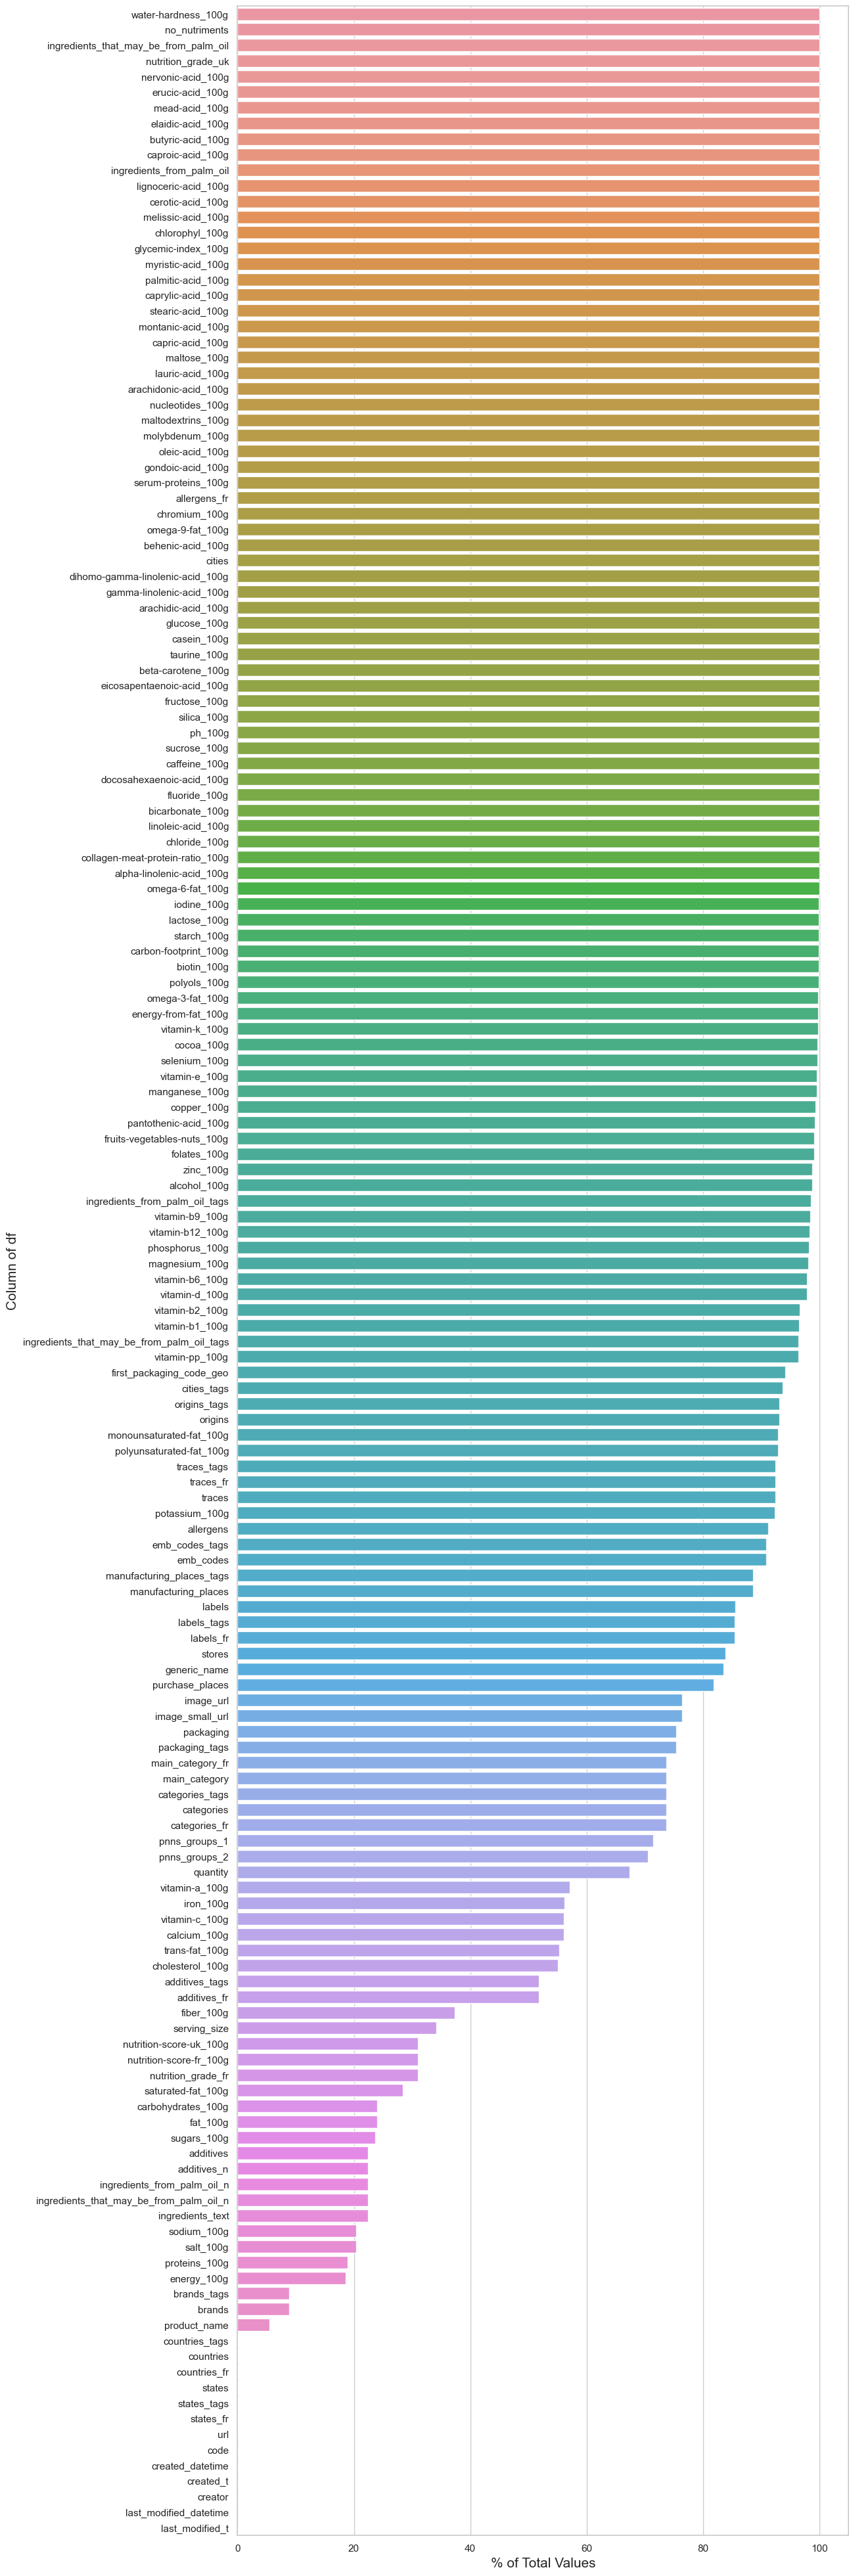

In [23]:
plt.figure(figsize=(12,50))
sns.barplot(x='% of Total Values',y='index', data=data_missing)
plt.xlabel('% of Total Values', fontsize=15)
plt.ylabel('Column of df', fontsize=15)
plt.show()

In [24]:
# Affichage des valeurs manquantes par colonnes en nombre et en ratio
#Initialisation
missingValueNumber = 0
missingValueNumberTotal = 0
missingValuesList = list()

#Boucle de calcul et d'affichage par colonnes
for col in df :
    missingValueNumber = df[col].isna().sum()
    missingValueRatio = missingValueNumber / df[col].size
    print (f'Colonne: {col} : {missingValueNumber} valeurs manquantes, ratio : {round(missingValueRatio,2)}')
    missingValueNumberTotal = missingValueNumberTotal + missingValueNumber
    missingValuesList.append(missingValueRatio)

# Affichage des valeurs manquantes au total en nombre et en ratio
missingValueRatioTotal = missingValueNumberTotal / df.size
print(f'Le data frame comprends {missingValueNumberTotal} valeurs manquantes au total soit un ratio de {round(missingValueRatioTotal,2)}')

Colonne: code : 23 valeurs manquantes, ratio : 0.0
Colonne: url : 23 valeurs manquantes, ratio : 0.0
Colonne: creator : 2 valeurs manquantes, ratio : 0.0
Colonne: created_t : 3 valeurs manquantes, ratio : 0.0
Colonne: created_datetime : 9 valeurs manquantes, ratio : 0.0
Colonne: last_modified_t : 0 valeurs manquantes, ratio : 0.0
Colonne: last_modified_datetime : 0 valeurs manquantes, ratio : 0.0
Colonne: product_name : 17762 valeurs manquantes, ratio : 0.06
Colonne: generic_name : 267977 valeurs manquantes, ratio : 0.84
Colonne: quantity : 215953 valeurs manquantes, ratio : 0.67
Colonne: packaging : 241812 valeurs manquantes, ratio : 0.75
Colonne: packaging_tags : 241811 valeurs manquantes, ratio : 0.75
Colonne: brands : 28412 valeurs manquantes, ratio : 0.09
Colonne: brands_tags : 28420 valeurs manquantes, ratio : 0.09
Colonne: categories : 236362 valeurs manquantes, ratio : 0.74
Colonne: categories_tags : 236383 valeurs manquantes, ratio : 0.74
Colonne: categories_fr : 236361 valeur

<a id='5'></a>

### 1.2 Traitement des colones ayant un pourcentage élevé des NAN

[Haut de page](#sommaire)

In [25]:
df = delete_nan(df ,60)

In [26]:
print(f"shape {df.shape}")
print_null_pct(df)

shape (320772, 42)
nb de null:  2944480 
pct de null:  21.9


* La fonction delete_nan supprime les colones qui ont un taux de NAN supérieur à 65 % .


In [27]:
# Checking Colonnes 

for i, c in enumerate(df.columns):
    print('\n'+c if i % 7 == 0 else c, end='   |   ')


code   |   url   |   creator   |   created_t   |   created_datetime   |   last_modified_t   |   last_modified_datetime   |   
product_name   |   brands   |   brands_tags   |   countries   |   countries_tags   |   countries_fr   |   ingredients_text   |   
serving_size   |   additives_n   |   additives   |   additives_tags   |   additives_fr   |   ingredients_from_palm_oil_n   |   ingredients_that_may_be_from_palm_oil_n   |   
nutrition_grade_fr   |   states   |   states_tags   |   states_fr   |   energy_100g   |   fat_100g   |   saturated-fat_100g   |   
trans-fat_100g   |   cholesterol_100g   |   carbohydrates_100g   |   sugars_100g   |   fiber_100g   |   proteins_100g   |   salt_100g   |   
sodium_100g   |   vitamin-a_100g   |   vitamin-c_100g   |   calcium_100g   |   iron_100g   |   nutrition-score-fr_100g   |   nutrition-score-uk_100g   |   

* La figure suivante montre la répartition des NAN aprés l'application de la fonction delete_nan : 

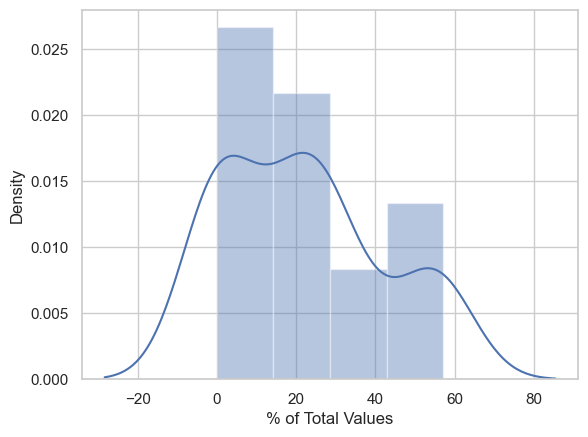

In [28]:
sns.set(style="whitegrid")
data_missing= pd.DataFrame((((df.isnull().sum()/len(df))*100 ).sort_values(ascending=False))).reset_index()
data_missing.rename(columns = {0:'% of Total Values'} , inplace= True)
sns.distplot(data_missing['% of Total Values'])
plt.show()

<a id='6'></a>

### 1.3 Correction des types de données

[Haut de page](#sommaire)

**Fonction qui corrige le type de données des colones catégories(Objet-> category)**

- La variable "ingredients_from_palm_oil_n" et la variable "ingredients_that_may_be_from_palm_oil_n" prennet respectivement 4 et 7 valeurs  se sont des valeurs catégorielles 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 42 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     320749 non-null  object 
 1   url                                      320749 non-null  object 
 2   creator                                  320770 non-null  object 
 3   created_t                                320769 non-null  object 
 4   created_datetime                         320763 non-null  object 
 5   last_modified_t                          320772 non-null  object 
 6   last_modified_datetime                   320772 non-null  object 
 7   product_name                             303010 non-null  object 
 8   brands                                   292360 non-null  object 
 9   brands_tags                              292352 non-null  object 
 10  countries                       

In [30]:
def convert_to_category(df): 
    categories_columns= ['ingredients_that_may_be_from_palm_oil_n','ingredients_from_palm_oil_n', 'additives_n'] #'nutrition_grade_fr', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'
    for column in categories_columns:
        df[column]= df[column].astype('category')
    return df 

In [31]:
df = convert_to_category(df)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 42 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   code                                     320749 non-null  object  
 1   url                                      320749 non-null  object  
 2   creator                                  320770 non-null  object  
 3   created_t                                320769 non-null  object  
 4   created_datetime                         320763 non-null  object  
 5   last_modified_t                          320772 non-null  object  
 6   last_modified_datetime                   320772 non-null  object  
 7   product_name                             303010 non-null  object  
 8   brands                                   292360 non-null  object  
 9   brands_tags                              292352 non-null  object  
 10  countries           

<a id='7'></a>

### 1.4 Traitement des colones non pertinents à l'étude

[Haut de page](#sommaire)

In [33]:
# Fonction qui supprime les colones non petinents à l'étude

def delete_non_relevant_column(data):
    searchfor= ['url','Unnamed','states','image']
    for i in data.loc[:, data.columns.str.contains('|'.join(searchfor))].columns:
        data.drop(columns=i, inplace=True)
    return data 

**Dans le présent jeu de données : Il y a des colones qui ne sont pas d'une grande utilité pour l'analyse et l'interprétation des données**  : 
* les colones qui contiennet des images ;
* les colons qui contiennt les sites web(url)
* les colones qui contiennet des state 

In [34]:
df = delete_non_relevant_column(df)

In [35]:
print(f"shape {df.shape}")
print_null_pct(df)

shape (320772, 38)
nb de null:  2944319 
pct de null:  24.2


In [36]:
# Checking Colonnes 

for i, c in enumerate(df.columns):
    print('\n'+c if i % 6 == 0 else c, end='   |   ')


code   |   creator   |   created_t   |   created_datetime   |   last_modified_t   |   last_modified_datetime   |   
product_name   |   brands   |   brands_tags   |   countries   |   countries_tags   |   countries_fr   |   
ingredients_text   |   serving_size   |   additives_n   |   additives   |   additives_tags   |   additives_fr   |   
ingredients_from_palm_oil_n   |   ingredients_that_may_be_from_palm_oil_n   |   nutrition_grade_fr   |   energy_100g   |   fat_100g   |   saturated-fat_100g   |   
trans-fat_100g   |   cholesterol_100g   |   carbohydrates_100g   |   sugars_100g   |   fiber_100g   |   proteins_100g   |   
salt_100g   |   sodium_100g   |   vitamin-a_100g   |   vitamin-c_100g   |   calcium_100g   |   iron_100g   |   
nutrition-score-fr_100g   |   nutrition-score-uk_100g   |   

<a id='8'></a>

### 1.5 Traitement des colones dates

[Haut de page](#sommaire)

In [37]:
data_types= pd.DataFrame(df.dtypes).reset_index()
data_missing_types= data_missing.merge(data_types, on='index', how='inner')
data_missing_types

index  % of Total Values         0
0   vitamin-a_100g                           57.117828          float64 
1   iron_100g                                56.211265          float64 
2   vitamin-c_100g                           56.085007          float64 
3   calcium_100g                             56.027958          float64 
4   trans-fat_100g                           55.327148          float64 
5   cholesterol_100g                         55.080244          float64 
6   additives_fr                             51.778834          object  
7   additives_tags                           51.778834          object  
8   fiber_100g                               37.374210          float64 
9   serving_size                             34.118003          object  
10  nutrition_grade_fr                       31.038245          object  
11  nutrition-score-fr_100g                  31.038245          float64 
12  nutrition-score-uk_100g                  31.038245          float64 
13  saturated-fat_100g                       28.437021          float64 
14  carbohydrates_100g                       24.061951          float64 
15  fat_100g                                 23.967491          float64 
16  sugars_100g                              23.630803          float64 
17  additives                                22.404387          object  
18  additives_n                              22.393787          category
19  ingredients_from_palm_oil_n              22.393787          category
20  ingredients_that_may_be_from_palm_oil_n  22.393787          category
21  ingredients_text                         22.386617          object  
22  sodium_100g                              20.359944          float64 
23  salt_100g                                20.345292          float64 
24  proteins_100g                            18.969860          float64 
25  energy_100g                              18.598568          float64 
26  brands_tags                              8.859876           object  
27  brands                                   8.857382           object  
28  product_name                             5.537266           object  
29  countries_fr                             0.087289           object  
30  countries                                0.087289           object  
31  countries_tags                           0.087289           object  
32  code                                     0.007170           object  
33  created_datetime                         0.002806           object  
34  created_t                                0.000935           object  
35  creator                                  0.000623           object  
36  last_modified_datetime                   0.000000           object  
37  last_modified_t                          0.000000           object

**Dans le jeu de données il y a quarte colones qui font référence à la date mais ils ont pour type objet:**

- les colones qui se treminet avec "_t" sont des dates au format timestamp  (nbr de secondes depuis le 1er janvier 1970).
- Les qui se terminent avec "_datetime" sont des dates au format iso8601 : yyyy-mm-ddThh:mn:ssZ

In [38]:
# Fonction qui convertit les colones dates (Objet-> Datetime )

def convet_datetime(data): 
    for col in data.columns: 
        if col.endswith('_t'): 
            data[col] = data[col].astype(float)
            data[col]= pd.to_datetime(data[col], unit='s')
        elif col.endswith('_datetime'):
            data[col]= pd.to_datetime(data[col], infer_datetime_format=True, format = "%Y-%m-%dT%h:%M:%s").dt.tz_localize(None)
    return data

In [39]:
df['created_datetime'].sort_values().tail(24)

189162    Auchan                   
189272    Auchan,Super U           
189404    Auchan,Super U           
189262    Banque alimentaire       
189152    Carrefour                
189242    Carrefour market         
189244    Carrefour market         
189364    Cora                     
189103    Dia,Sogeres              
189269    Leclerc                  
189260    Spar                     
189406    Super U                  
189345    Super U,Leclerc,Carrefour
189119    SuperU                   
189250    SuperU,Leclerc           
187478    NaN                      
189068    NaN                      
189109    NaN                      
189160    NaN                      
189168    NaN                      
189248    NaN                      
189362    NaN                      
189379    NaN                      
189417    NaN                      
Name: created_datetime, dtype: object

In [40]:
#df.loc[189068, :]

In [41]:
del_inx = list(df['created_datetime'].sort_values().tail(24).index)

df.drop(del_inx, axis = 0, inplace = True)

In [42]:
df['created_datetime'].sort_values().tail(25)

306727    2017-04-20T19:45:47Z
176771    2017-04-20T19:47:59Z
114882    2017-04-20T19:56:20Z
199269    2017-04-20T20:03:48Z
214302    2017-04-20T20:13:14Z
307216    2017-04-20T20:31:17Z
244043    2017-04-20T20:32:13Z
184023    2017-04-20T20:48:32Z
231677    2017-04-20T20:57:44Z
283334    2017-04-20T21:00:34Z
231642    2017-04-20T21:03:04Z
282642    2017-04-20T21:04:53Z
315032    2017-04-20T21:08:13Z
278294    2017-04-20T21:08:33Z
185978    2017-04-20T21:12:44Z
315033    2017-04-20T21:13:06Z
244295    2017-04-20T21:24:43Z
176772    2017-04-20T21:27:31Z
176773    2017-04-20T21:39:37Z
224044    2017-04-20T21:46:17Z
320330    2017-04-20T22:18:47Z
284564    2017-04-20T23:34:04Z
197554    2017-04-20T23:59:14Z
176774    2017-04-21T00:18:57Z
211769    2017-04-21T01:15:03Z
Name: created_datetime, dtype: object

In [43]:
df = convet_datetime(df)

In [44]:
df.dtypes

code                                       object        
creator                                    object        
created_t                                  datetime64[ns]
created_datetime                           datetime64[ns]
last_modified_t                            datetime64[ns]
last_modified_datetime                     datetime64[ns]
product_name                               object        
brands                                     object        
brands_tags                                object        
countries                                  object        
countries_tags                             object        
countries_fr                               object        
ingredients_text                           object        
serving_size                               object        
additives_n                                category      
additives                                  object        
additives_tags                             object        
additives_fr  

In [45]:
# for col in df.columns:
#     if df[col].dtype == 'category':
#         print(col , df[col].nunique() )
        
        

<a id='9'></a>

### 1.6 Filtrage de la zone d'étdues

[Haut de page](#sommaire)

In [46]:
df['countries'].unique().tolist() #.sort_values().tail(25)

['en:FR',
 'US',
 'France',
 'en:GB',
 'France, US',
 'Canada',
 'United Kingdom',
 'en:CH',
 'en:ES',
 'Deutschland',
 'en:SI',
 'en:DE',
 'en:IT',
 'en:RO',
 'España',
 'en:AU',
 'en:PT',
 'United States',
 'Germany',
 'Usa',
 'France,Royaume-Uni',
 'UK,France',
 'France,Belgique,Pays-Bas,Royaume-Uni',
 'France,United Kingdom',
 'en:GP',
 'France,UK',
 'États-Unis',
 'Royaume-Uni,France',
 'en:CA',
 nan,
 'en:US,United Kingdom',
 'Switzerland',
 'en:US',
 'en:CA, US',
 'Nederland',
 'en:AU, en:france',
 'Australia',
 'France,Suisse,États-Unis,Canada',
 'États-Unis, en:france, US',
 'Ireland',
 'United Kingdom, US',
 'en:RE, en:france',
 'United States, en:france',
 'en:TW',
 'en:AU, Suisse',
 'Deutschland, en:france',
 'Suisse',
 'en:BR',
 'Belgique,France',
 'en:DO',
 'en:FR, US',
 'Belgique,France,Pays-Bas,Royaume-Uni',
 'France,United States',
 'Australie, US',
 'USA',
 'en:SA',
 'Saudi Arabia',
 'en:AE',
 'en:IQ',
 'en:KW',
 'Republica Moldova',
 'Belgium',
 'en:NC',
 'Singapore'

In [47]:
#Affichage des 50 valeurs les plus utilisées dans la colonne 'countries'
countriesSeries=(df['countries'].value_counts())
countriesSeries.sort_values(inplace=True)
countriesSeries.tail(60)

en:RO                     98    
Netherlands               102   
en:JP                     102   
en:DZ                     107   
en:CN                     109   
France, en:switzerland    116   
en:TW                     119   
en:PT                     121   
France,United Kingdom     125   
UK,France                 125   
Schweiz                   127   
Ireland                   127   
en:LU                     129   
Italy                     131   
France,UK                 135   
en:MA                     137   
en:RU                     141   
Italie                    144   
Germany,Switzerland       147   
en:BR                     151   
Denmark                   152   
Magyarország              153   
Brasil                    157   
Österreich                162   
en:NL                     168   
en:TH                     175   
en:AT                     190   
en:FR, Suisse             204   
France,Suisse             211   
en:CZ                     216   
Belgique,F

In [48]:
def choix_pays(df):
    liste_pays = ['France', 'FR', 'en:FR', 'en:fr', 'en:France', 'Frankreich', 
              'france', 'Réunion', 'Francia', 'French Polynesia', 'Frankrijk', 
              'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe', 
              'Polynésie Française', 'Mayotte'] 
    return df[df['countries'].isin(liste_pays)]

In [49]:
df =choix_pays(df)

In [50]:
df['countries'].unique().tolist() 

['en:FR',
 'France',
 'Réunion',
 'Nouvelle-Calédonie',
 'FR',
 'Martinique',
 'Guadeloupe',
 'Frankrijk',
 'france',
 'Frankreich',
 'French Polynesia',
 'Francia',
 'Mayotte']

<a id='10'></a>

### 1.7 Traitement des colonnes contenant des informations redondantes

[Haut de page](#sommaire)

**Après examen des colones de la df : plusieurs colones contiennet presque les mêmes informations**

In [51]:
df_diff = df.copy()
df_diff['Diff']= np.where(df_diff['last_modified_datetime']==df_diff['last_modified_t'] , 1 ,0)
sum(df_diff['Diff']) == len(df_diff)

True

In [52]:
df_diff[['brands', 'brands_tags']].isna().mean(axis=0)


brands         0.125618
brands_tags    0.125660
dtype: float64

In [53]:
df_diff[['countries', 'countries_tags']].isna().mean(axis=0)


countries         0.0
countries_tags    0.0
dtype: float64

In [54]:
df_diff[['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']].isna().mean(axis=0)

ingredients_from_palm_oil_n                0.464963
ingredients_that_may_be_from_palm_oil_n    0.464963
dtype: float64

In [55]:
df_diff[['nutrition-score-uk_100g', 'nutrition-score-fr_100g']].isna().mean(axis=0)

nutrition-score-uk_100g    0.380558
nutrition-score-fr_100g    0.380558
dtype: float64

In [56]:
def remove_columns(df):
    colone_a_supprimer = ['last_modified_datetime', 'created_datetime' ,'categories_tags','categories_en'
                      ,'brands_tags','countries_tags' ,'countries_en','origins_tags','traces_tags' ,
                      'traces_en', 'main_category_en', 'nutrition-score-uk_100g']
    for col in colone_a_supprimer : 
        if col in df.columns : 
            df.drop(columns=[col],axis='columns', inplace=True)
    return df 

In [57]:
df = remove_columns(df)
df.columns

Index(['code', 'creator', 'created_t', 'last_modified_t', 'product_name',
       'brands', 'countries', 'countries_fr', 'ingredients_text',
       'serving_size', 'additives_n', 'additives', 'additives_tags',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

**Remplacement des noms invalides (1 ou 0 caractère) par np.NaN**

In [58]:
df.loc[df[df['product_name'].str.len()<2].index,'product_name'] = np.nan

<a id='11'></a>

### 1.8 Traitement des valeurs négatives

[Haut de page](#sommaire)

In [59]:
df.select_dtypes(['float64']).describe()

energy_100g      fat_100g  saturated-fat_100g  trans-fat_100g  \
count  6.146800e+04  44626.000000  59418.000000        211.000000       
mean   1.167941e+03  13.275043     5.385418            0.333905         
std    1.315690e+04  16.988729     8.537914            1.304417         
min    0.000000e+00  0.000000      0.000000            0.000000         
25%    4.268750e+02  1.300000      0.300000            0.000000         
50%    1.027000e+03  6.800000      1.900000            0.030000         
75%    1.640000e+03  21.000000     7.300000            0.300000         
max    3.251373e+06  380.000000    210.000000          17.200000        

       cholesterol_100g  carbohydrates_100g   sugars_100g    fiber_100g  \
count  249.000000        44212.000000        59515.000000  43665.000000   
mean   0.060354          27.306064           13.235392     2.522458       
std    0.690866          27.305918           19.027931     4.633169       
min    0.000000          0.000000           -0.100000      0.000000       
25%    0.000000          4.000000            1.000000      0.000000       
50%    0.000000          14.000000           4.000000      1.300000       
75%    0.012500          52.700000           17.000000     3.200000       
max    10.900000         190.000000          105.000000    178.000000     

       proteins_100g     salt_100g   sodium_100g  vitamin-a_100g  \
count  61219.000000   59574.000000  59571.000000  422.000000       
mean   7.792804       1.160853      0.457050      0.000813         
std    7.929396       4.290308      1.689078      0.006576         
min    0.000000       0.000000      0.000000      0.000000         
25%    1.800000       0.080000      0.031496      0.000120         
50%    6.000000       0.570000      0.224409      0.000160         
75%    11.000000      1.250000      0.492126      0.000561         
max    100.000000     211.000000    83.000000     0.120000         

       vitamin-c_100g  calcium_100g   iron_100g  nutrition-score-fr_100g  
count  1088.000000     1912.000000   915.000000  58528.000000             
mean   0.146208        0.341467      0.051250    8.601165                 
std    3.057169        1.870324      0.851378    9.017775                 
min    0.000000        0.000000      0.000000   -15.000000                
25%    0.012000        0.120000      0.002655    1.000000                 
50%    0.020000        0.135000      0.005800    8.000000                 
75%    0.030000        0.344400      0.008000    15.000000                
max    100.000000      69.500000     25.000000   40.000000

In [60]:
col_moins = ['sugars_100g']
def negative_values(df) : 
    for column in col_moins :
        df.loc[df[column] < 0] = np.nan
    return df

In [61]:
df= negative_values(df)

In [62]:
df.select_dtypes(['float64']).describe()

energy_100g      fat_100g  saturated-fat_100g  trans-fat_100g  \
count  6.146700e+04  44625.000000  59417.000000        211.000000       
mean   1.167937e+03  13.274668     5.385156            0.333905         
std    1.315701e+04  16.988734     8.537746            1.304417         
min    0.000000e+00  0.000000      0.000000            0.000000         
25%    4.267500e+02  1.300000      0.300000            0.000000         
50%    1.027000e+03  6.800000      1.900000            0.030000         
75%    1.640000e+03  21.000000     7.300000            0.300000         
max    3.251373e+06  380.000000    210.000000          17.200000        

       cholesterol_100g  carbohydrates_100g   sugars_100g    fiber_100g  \
count  249.000000        44211.000000        59514.000000  43665.000000   
mean   0.060354          27.306663           13.235616     2.522458       
std    0.690866          27.305936           19.028012     4.633169       
min    0.000000          0.000000            0.000000      0.000000       
25%    0.000000          4.000000            1.000000      0.000000       
50%    0.000000          14.000000           4.000000      1.300000       
75%    0.012500          52.700000           17.000000     3.200000       
max    10.900000         190.000000          105.000000    178.000000     

       proteins_100g     salt_100g   sodium_100g  vitamin-a_100g  \
count  61218.000000   59573.000000  59570.000000  422.000000       
mean   7.792681       1.160849      0.457048      0.000813         
std    7.929403       4.290344      1.689092      0.006576         
min    0.000000       0.000000      0.000000      0.000000         
25%    1.800000       0.080000      0.031496      0.000120         
50%    6.000000       0.570000      0.224409      0.000160         
75%    11.000000      1.250000      0.492126      0.000561         
max    100.000000     211.000000    83.000000     0.120000         

       vitamin-c_100g  calcium_100g   iron_100g  nutrition-score-fr_100g  
count  1088.000000     1911.000000   915.000000  58527.000000             
mean   0.146208        0.341463      0.051250    8.601056                 
std    3.057169        1.870813      0.851378    9.017813                 
min    0.000000        0.000000      0.000000   -15.000000                
25%    0.012000        0.120000      0.002655    1.000000                 
50%    0.020000        0.135000      0.005800    8.000000                 
75%    0.030000        0.343100      0.008000    15.000000                
max    100.000000      69.500000     25.000000   40.000000

- Les valeurs remplacées par np.nan seront traités avec les valeurs manquantes

<a id='12'></a>

### 1.9 Traitement des colones _100g 

[Haut de page](#sommaire)

**on va visualiser des anomalies à l'aide de boîtes à moustaches**


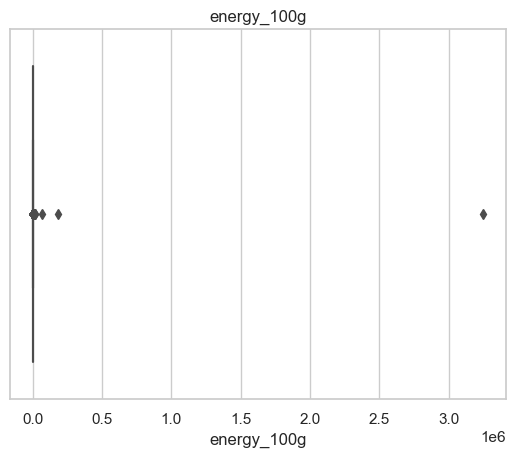

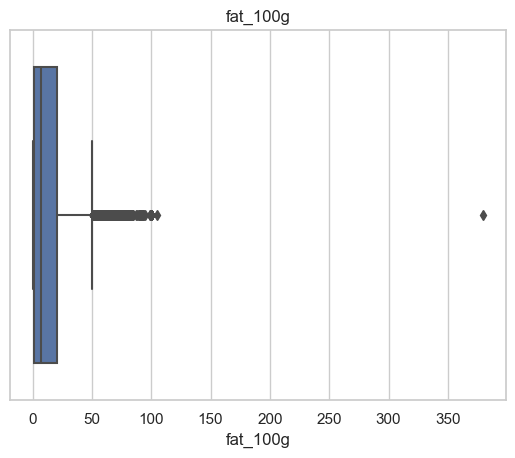

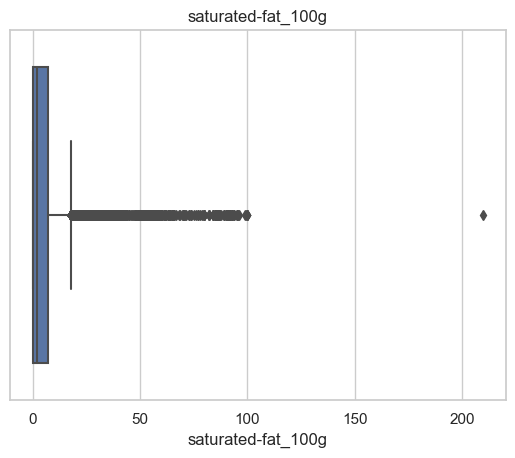

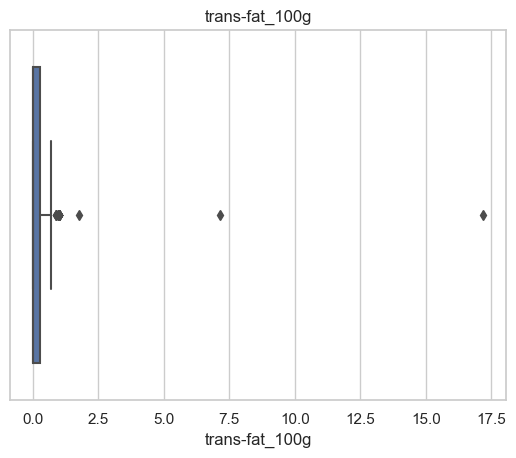

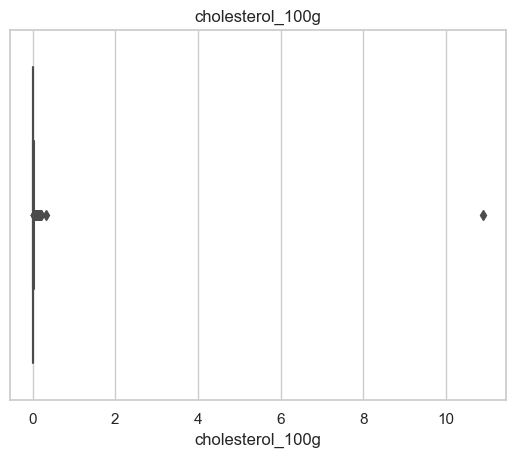

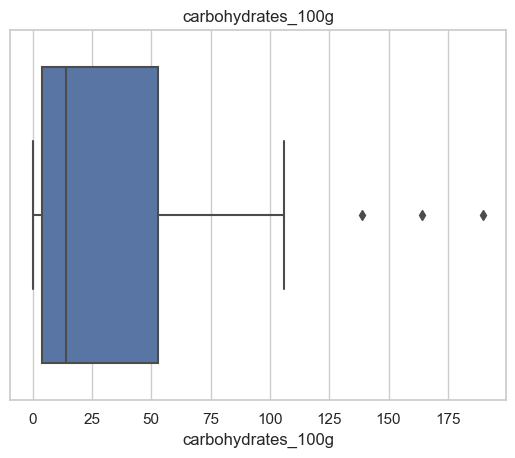

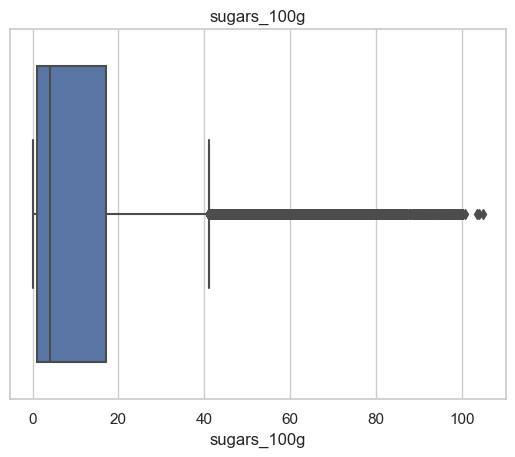

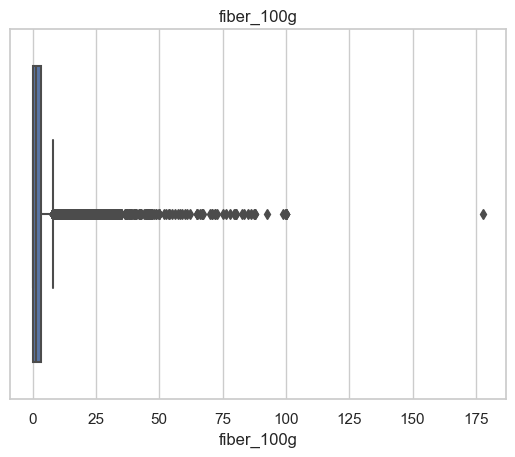

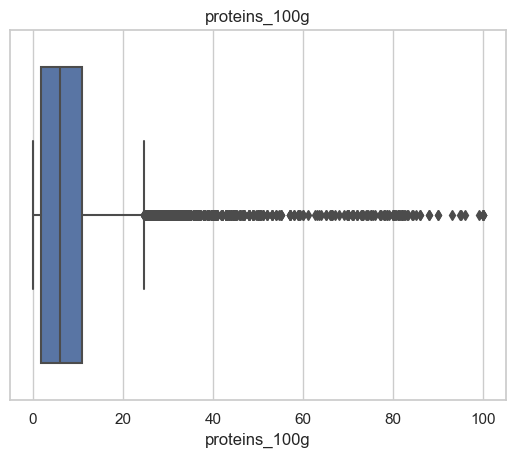

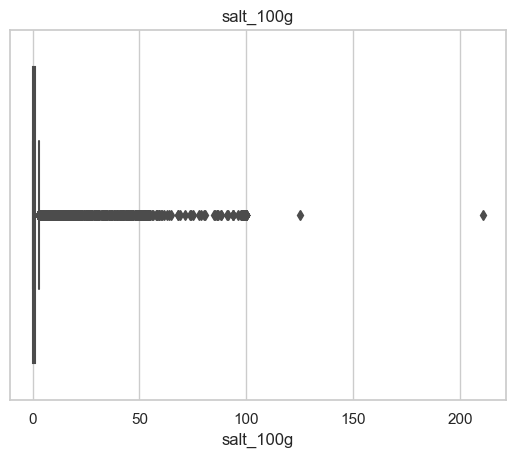

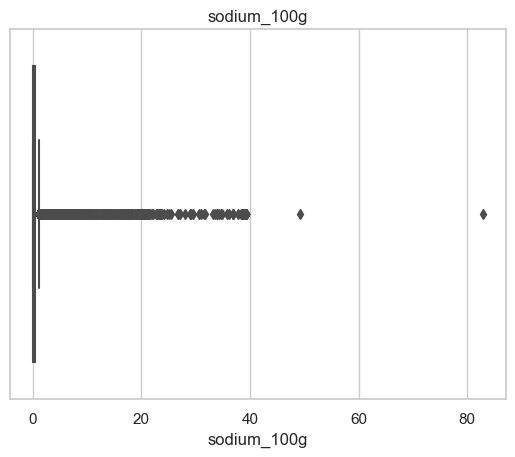

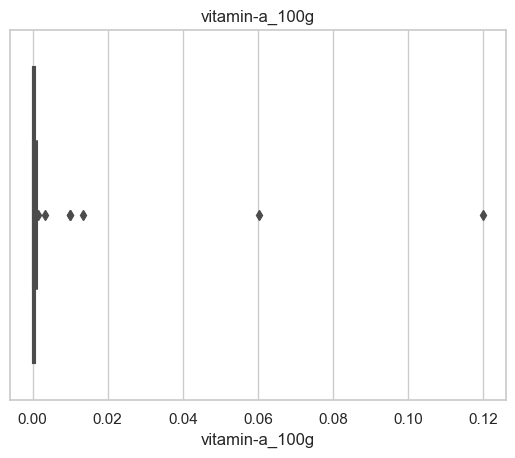

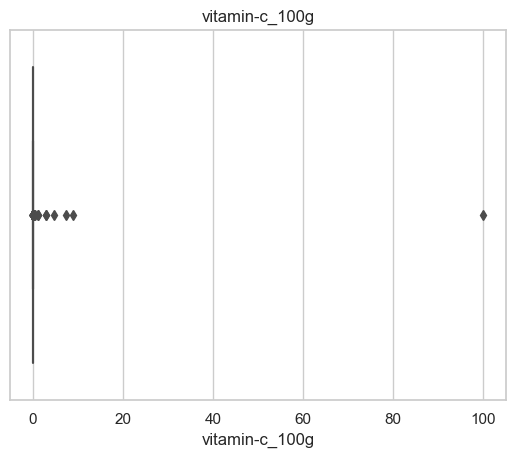

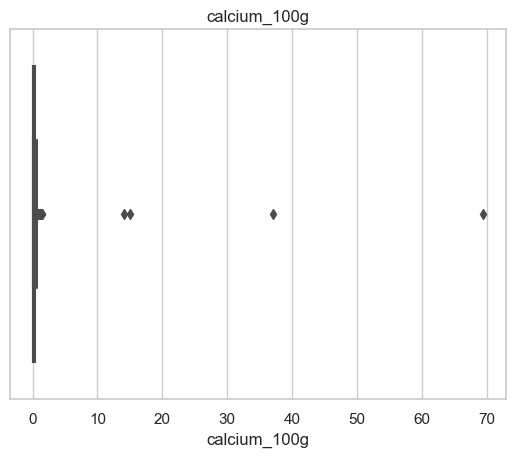

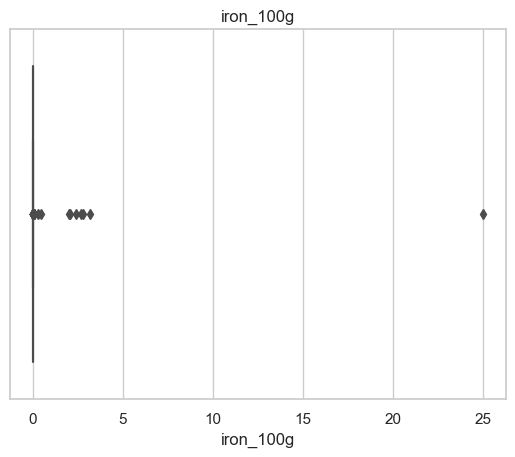

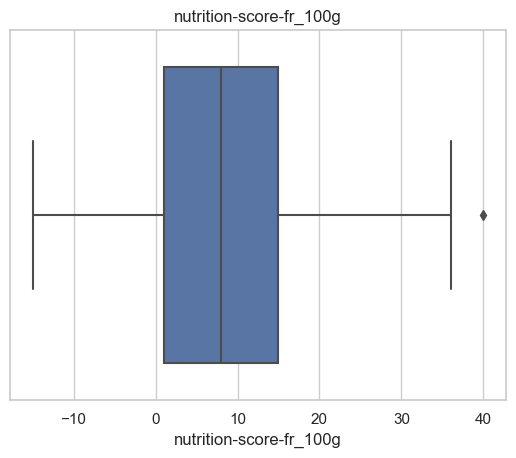

In [63]:
# Création des boîtes à moustache pour détecter les anomalies 
for col_value in df.columns:
    if df[col_value].dtypes == 'float64':
        sns.boxplot(x=col_value, data=df)
        plt.title(col_value)
        plt.show()

Les données nutritives étant pour 100g et les valeurs ne peuvent pas dépasser des seuils mais On voit que certains aliments ont la calories plus 300kcal et inférieures à 0

In [64]:
df.columns

Index(['code', 'creator', 'created_t', 'last_modified_t', 'product_name',
       'brands', 'countries', 'countries_fr', 'ingredients_text',
       'serving_size', 'additives_n', 'additives', 'additives_tags',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [65]:
def column_100g(df) : 
    col_100g = [c for c in df.columns if c.endswith('_100g') and c!='energy_100g' 
                 and c!='nutrition-score-uk_100g' and c!='nutrition-score-fr_100g']
    for i in range(len(col_100g)):
        colonne = col_100g[i]
        mask = df[colonne] > 100.0
        df = df.drop(df[mask].index)
    return df

In [66]:
df= column_100g(df)

<a id='13'></a>

### 1.10 Traitement des outliers (atypiques et aberrants)

[Haut de page](#sommaire)

- [X]  Vérifier les outliers pour les autres variables qui sont des apports nutritionnels  100g 

> Il y a des valeurs atypiques, des produits mal catégorisés par le contributeur, il y a des valeurs aberrantes mal renseignées par le contributeur (notamment energie 100g (kj)

In [67]:
df_2= df.copy()

In [68]:
df= treat_outliers_std(df)
df_2= treat_outliers_quantille(df_2)

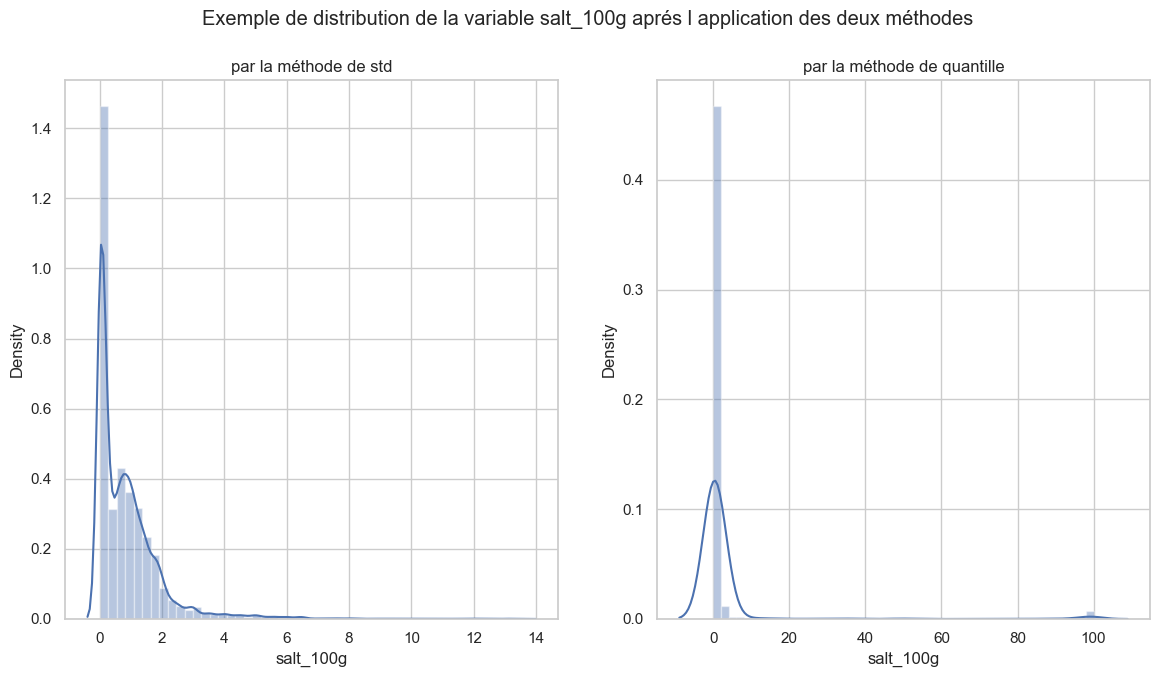

In [69]:
fig, axes= plt.subplots(1,2, figsize= (14,7))

fig.suptitle('Exemple de distribution de la variable salt_100g aprés l application des deux méthodes ')
ax1 = sns.distplot(df['salt_100g'].dropna() , ax= axes[0])
ax1.set_title('par la méthode de std')
ax2 = sns.distplot(df_2['salt_100g'].dropna() , ax= axes[1])
ax2.set_title('par la méthode de quantille')
plt.show()

La méthode avec l'écart type donne des résultats plus cohérents en  termes de grandeur 
pour la méthode de percentille l'ordre de grandeur est trés élévée . Possibilité que tous les outliers n'ont pas été retiré de la df. 

- [X] Problèmatique entre le nutriscore_score et le nutrition_grade_fr

> Les groupes nutrition_grade_fr ne sont pas bien définis 


- [X]  Vérifier les outliers pour  chaque groupes nutrition_grade_fr 

> il y a des valeur du nutrition_grade_fr qui se chevauchent pour les groupes qui ne permettent pas de bien définir les groupes

**IQR range method**

L'intervalle interquartile (IQR) est la différence entre le 75e centile (Q3) et le 25e centile (Q1) dans un ensemble de données. Il mesure l'étalement des 50 % médians des valeurs.

Vous pouvez définir une observation comme étant une valeur aberrante si elle est 1,5 fois l'intervalle interquartile supérieure au troisième quartile (Q3) ou 1,5 fois l'intervalle interquartile inférieur au premier quartile (Q1).

Valeurs aberrantes = Observations > Q3 + 1,5IQR ou Q1 – 1,5IQR

In [70]:
#  fonction IQR methode pour détecter outliers 
def detect_outliers_IQR(var):
    Q1 = np.quantile(var, 0.25)  
    Q3 = np.quantile(var, 0.75)
    EIQ = Q3 - Q1
    LI = Q1 - (EIQ*1.5)
    LS = Q3 + (EIQ*1.5)    
    i = list(var.index[(var < LI) | (var > LS)])
    val = list(var[i])
    return i, val

In [71]:
from termcolor import colored

# Création liste des groupes nutriscore_grade
list_nutriscore_grade = ['a','b','c','d','e']

# IQR methode pour détecter outliers 
# Boucle sur chaque group nutriscore_grade pour déterminer leurs outliers
for score in list_nutriscore_grade:
    group_nutriscore_grade = df.groupby('nutrition_grade_fr')
    groups = group_nutriscore_grade.get_group(score)

    outliers_IQR = detect_outliers_IQR(groups['nutrition-score-fr_100g'])
    print(colored('IQR methode', 'blue'))
    print('Le groupe :' , colored(score, 'red'))
    print(f'Les index considérées comme outliers pour le groupe {score} avec la methode IQR : ', sorted(np.unique(outliers_IQR[0])))
    print(f'Les valeurs considérées comme outliers pour le groupe {score} avec la methode IQR : ', sorted(np.unique(outliers_IQR[1])))
    print('')

IQR methode
Le groupe : a
Les index considérées comme outliers pour le groupe a avec la methode IQR :  [177076, 177548, 185034, 187622, 187623, 187656, 187665, 187715, 187716, 187718, 187728, 187737, 187756, 188958, 190485, 190499, 190520, 192056, 192127, 192682, 192688, 192762, 192770, 192792, 192824, 192830, 192846, 192919, 192924, 194412, 194425, 194471, 194475, 195649, 199713, 199732, 199759, 200003, 200004, 200005, 200006, 200359, 202434, 202626, 204523, 204524, 204527, 204553, 204619, 204655, 204895, 204900, 205123, 205133, 205135, 205412, 205413, 207616, 208832, 209313, 209716, 209820, 209974, 210001, 210417, 210455, 210784, 210807, 210998, 211000, 211001, 211279, 211284, 211294, 212047, 212057, 212072, 212156, 212172, 212929, 214699, 214710, 214711, 214985, 215393, 215395, 215420, 215484, 217317, 217318, 217336, 217386, 217387, 217388, 218761, 218767, 218790, 218793, 218796, 218804, 219182, 219434, 219435, 219693, 219825, 220008, 220193, 220374, 221967, 223591, 223594, 223596, 

- [X] La methode IQR ne trouve pas correctement les outliers 


- [X] Les groupes nutriscore_grade ne sont pas bien définis, des valeurs se chevauchent entres les groupes 

> La methode IQR n'a pas détecte les outliers inter-groupes 

**Z_score method**

Un score z vous indique le nombre d'écarts types entre une valeur donnée et la moyenne. Nous utilisons la formule suivante pour calculer un z-score :

z = (X – ) / σ

où:

X est une seule valeur de données brutes est la moyenne de la population est l'écart type de la population

Vous pouvez définir une observation comme étant une valeur aberrante si elle a un score z inférieur à -3 ou supérieur à 3.

Valeurs aberrantes = Observations avec des scores z > 3 ou < -3

In [72]:
import scipy.stats as stats

# Boucle sur chaque group nutriscore_grade pour déterminer leurs outliers
for score in list_nutriscore_grade:
    group_nutriscore_grade = df.groupby('nutrition_grade_fr')
    group = group_nutriscore_grade.get_group(score)

    z = np.abs(stats.zscore(group[['nutrition-score-fr_100g']]))

    # ne conserve que les lignes dans le cadre de données avec tous les scores z supérieur à la valeur absolue de 3
    ouliers_Zscore = group[['nutrition-score-fr_100g']][(z>3).all(axis=1)]

    # trouver combien de product sont des outliers 
    print(colored('Z_score methode', 'blue'))
    print('Le groupe :' , colored(score, 'red'))
    print(f'Les index considérées comme outliers pour le groupe {score} avec la methode Z_score :', list(ouliers_Zscore.index))
    print(f'Les valeurs considérées comme outliers pour le groupe {score} avec la methode IQR : ', list(np.unique(ouliers_Zscore['nutrition-score-fr_100g'].values)))

Z_score methode
Le groupe : a
Les index considérées comme outliers pour le groupe a avec la methode Z_score : [177548, 185034, 188958, 190485, 190499, 190520, 192056, 192682, 192824, 192846, 192919, 192924, 194412, 199713, 199759, 202626, 204523, 204524, 204527, 204619, 204655, 205123, 205133, 208832, 209313, 209820, 209974, 210455, 210784, 210807, 210998, 211000, 211001, 211279, 211284, 211294, 212057, 212072, 212929, 214699, 217317, 217318, 217336, 217386, 217387, 217388, 218761, 218767, 218790, 218793, 218796, 218804, 219182, 219825, 220008, 220374, 221967, 223591, 223596, 223606, 227575, 229163, 237900, 237929, 237934, 238839, 240608, 240661, 240747, 240899, 240909, 242129, 242291, 242990, 243346, 243382, 243388, 245454, 245693, 246040, 246072, 246245, 246385, 246722, 248286, 250001, 255477, 279242, 281408, 304683]
Les valeurs considérées comme outliers pour le groupe a avec la methode IQR :  [-14.0, -13.0, -12.0, -11.0, 4.0, 6.0, 10.0]
Z_score methode
Le groupe : b
Les index consi

- [X] La methode Z_score ne trouve pas correctement les outliers 

**LOF (Local outliers factor)**

Il s'agit d'une méthode basée sur la densité dans laquelle les valeurs aberrantes sont situées dans des régions clairsemées. Il définit les valeurs aberrantes par rapport à la région locale, compare la densité locale du point de requête avec la densité locale des voisins et si la densité locale du point de requête est beaucoup plus faible, il est étiqueté comme valeur aberrante. Le processus est comme suit-

Définir la région locale autour du point de requête par ses k voisins les plus proches (« voisins de la requête ») Pour les voisins de requête éloignés, utilisez la distance entre le voisin de requête et le point de requête – Pour les voisins proches, utilisez la distance au kième voisin le plus proche du voisin de requête Les distances moyennes sur tous les voisins de la requête sont appelées « distance d'accessibilité moyenne » Densité locale = l'inverse de la distance d'accessibilité moyenne LOF = densité locale moyenne des voisins / densité locale du point de requête - LOF ≈ 1 densité similaire aux voisins - LOF < 1 densité supérieure à voisins (point normal) – LOF > 1 densité inférieure à celle des voisins (valeur aberrante)

In [73]:
 # voir les valeurs uniques nutriscore_score pour chaque groupe nutriscore_grade
list_nutriscore_grade = ['a','b','c','d','e'] 

# Boucle sur chaque group nutriscore_grade afin de déterminer les valeurs uniques nutriscore_score
for score in list_nutriscore_grade:
    gps = df.groupby('nutrition_grade_fr')
    gps1 = gps.get_group(score)
    print(f'Les valeurs unique du groupe {score.upper()}', sorted(list(gps1['nutrition-score-fr_100g'].unique())))

Les valeurs unique du groupe A [-14.0, -13.0, -12.0, -11.0, -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 4.0, 6.0, 10.0]
Les valeurs unique du groupe B [-8.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0]
Les valeurs unique du groupe C [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Les valeurs unique du groupe D [6.0, 7.0, 8.0, 9.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
Les valeurs unique du groupe E [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0]


<Figure size 1800x1400 with 0 Axes>

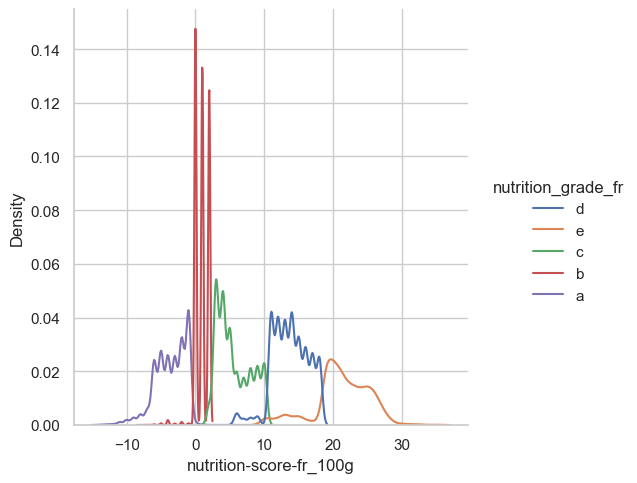

In [74]:
# afficher les distributions KDE des groupes nutriscore_grade
plt.figure(figsize=(18,14))
sns.displot(data=df, x="nutrition-score-fr_100g", hue="nutrition_grade_fr", kind='kde')

In [75]:
# Voir les valeurs extremes pour les nutriscores_scores (les groupes ne sont pas bien définis)
df.groupby('nutrition_grade_fr')[['nutrition-score-fr_100g']].agg([min,max,np.mean, len])

nutrition-score-fr_100g                        
                                       min   max       mean    len
nutrition_grade_fr                                                
a                  -14.0                    10.0 -3.605230   9484 
b                  -8.0                     2.0   0.895788   8761 
c                   2.0                     10.0  5.557061   12180
d                   6.0                     18.0  13.796249  14395
e                   10.0                    35.0  21.254372  9836

- [x] Détecter les outliers avec Local outliers factor 

> Permet de bien définir les groupes en supprimant les outliers 

In [76]:
# Les produits mal classés dans le groupe B qui se chevauchent entre le groupe A et B (-8 nutriscore_score)
print(df[(df['nutrition-score-fr_100g']== -1)&(df['nutrition_grade_fr']=='b')].index)
len(df[(df['nutrition-score-fr_100g']== -1)&(df['nutrition_grade_fr']=='b')])

Int64Index([175374, 193260, 194137, 207418, 209626, 210057, 217864, 218845,
            227959, 272570, 276868, 298103, 303500],
           dtype='int64')


13

In [77]:
# Les produits mal classés dans le groupe B qui se chevauchent entre le groupe A et B (-8 nutriscore_score)
print(df[(df['nutrition-score-fr_100g']== -1)&(df['nutrition_grade_fr']=='a')].index)
len(df[(df['nutrition-score-fr_100g']== -1)&(df['nutrition_grade_fr']=='a')])

Int64Index([ 12897,  20775,  30003,  34430,  62545,  67752, 100661, 102145,
            106485, 108286,
            ...
            315810, 316252, 316478, 317311, 317641, 318031, 318890, 319359,
            319578, 320497],
           dtype='int64', length=2103)


2103

In [78]:
print(df[(df['nutrition-score-fr_100g']== 2)&(df['nutrition_grade_fr']=='b')].index)
len(df[(df['nutrition-score-fr_100g']== 2)&(df['nutrition_grade_fr']=='b')])

Int64Index([   552,    564,  23697,  59578,  66022,  66200,  67172,  67744,
             67813,  68085,
            ...
            317895, 317967, 317969, 317979, 318381, 318395, 319742, 320089,
            320648, 320702],
           dtype='int64', length=2679)


2679

In [79]:
print(df[(df['nutrition-score-fr_100g']== 2)&(df['nutrition_grade_fr']=='c')].index)
len(df[(df['nutrition-score-fr_100g']== 2)&(df['nutrition_grade_fr']=='c')])

Int64Index([ 36080, 174666, 174988, 175907, 177236, 177350, 178265, 178430,
            178432, 178433,
            ...
            316035, 316082, 316103, 316112, 316128, 316133, 316138, 316155,
            317966, 320763],
           dtype='int64', length=359)


359

In [80]:
print(df[(df['nutrition-score-fr_100g']== -5)&(df['nutrition_grade_fr']=='b')].index)
len(df[(df['nutrition-score-fr_100g']== -5)&(df['nutrition_grade_fr']=='b')])

Int64Index([200656, 202469, 213525, 217853, 227495, 227897, 240429, 243413,
            243509, 247244, 255310, 278332, 310825],
           dtype='int64')


13

In [81]:
print(df[(df['nutrition-score-fr_100g']== 10)&(df['nutrition_grade_fr']=='c')].index)
len(df[(df['nutrition-score-fr_100g']== 10)&(df['nutrition_grade_fr']=='c')])

Int64Index([ 19570,  26393,  29136,  66899,  66907,  67850,  67921,  75119,
             99006, 102233,
            ...
            315540, 315759, 315961, 316836, 317062, 317485, 318132, 318509,
            320652, 320670],
           dtype='int64', length=1137)


1137

In [82]:
print(df[(df['nutrition-score-fr_100g']== 10)&(df['nutrition_grade_fr']=='d')].index)
len(df[(df['nutrition-score-fr_100g']== 10)&(df['nutrition_grade_fr']=='d')])

Int64Index([], dtype='int64')


0

In [83]:
print(df[(df['nutrition-score-fr_100g']== 18)&(df['nutrition_grade_fr']=='d')].index)
len(df[(df['nutrition-score-fr_100g']== 18)&(df['nutrition_grade_fr']=='d')])

Int64Index([   509,  11327,  11329,  11343,  25086,  34626,  67987, 111661,
            112868, 113123,
            ...
            315756, 315861, 315958, 315988, 316177, 316425, 317689, 318120,
            319192, 320593],
           dtype='int64', length=1286)


1286

In [84]:
print(df[(df['nutrition-score-fr_100g']== 18)&(df['nutrition_grade_fr']=='e')].index)
len(df[(df['nutrition-score-fr_100g']== 18)&(df['nutrition_grade_fr']=='e')])

Int64Index([ 13112, 179207, 179325, 184486, 189590, 189962, 198619, 198622,
            205472, 206058, 214364, 216087, 216189, 217095, 222902, 225363,
            225602, 230364, 232453, 239949, 241220, 242564, 242721, 242722,
            246193, 247246, 252913, 253711, 255173, 255174, 270965, 272637,
            278208, 281346, 281782, 281801, 281893, 283276, 283277, 283278,
            290213, 297138, 297140, 298106, 301820, 317963, 317970, 317974],
           dtype='int64')


48

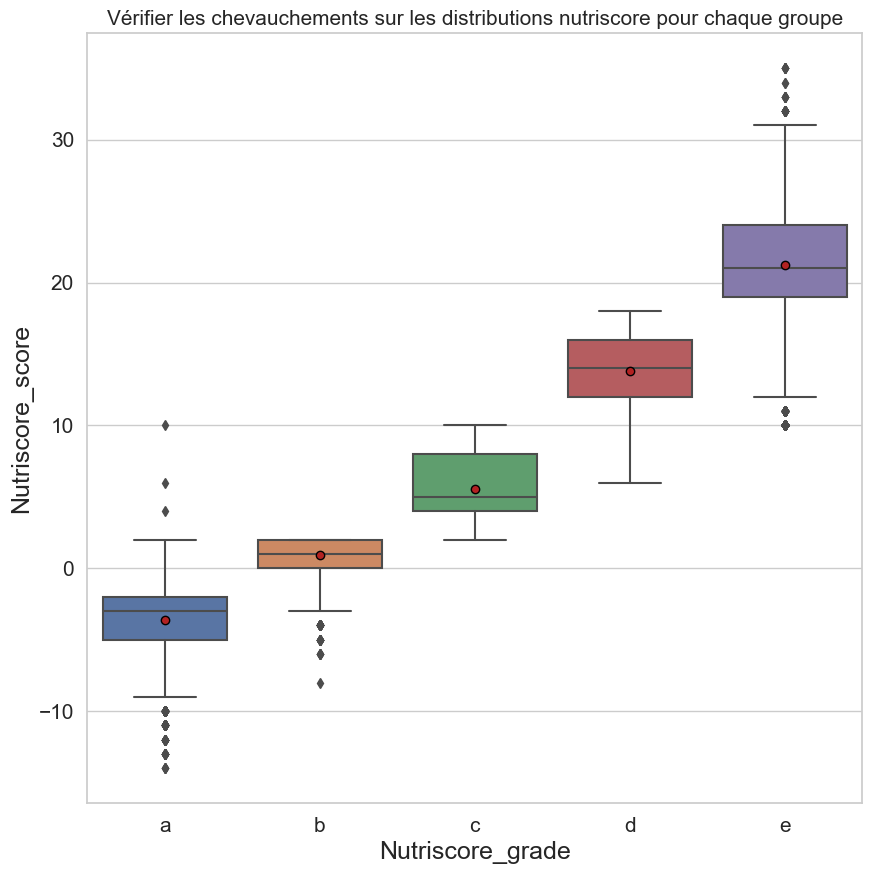

In [85]:
#Vérifier avec boxplotnutriscore en fonction de chaque groupe nutriscore_grade afin de voir les valeurs qui se chevauchent et les outliers 
meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}

plt.figure(figsize=(10,10))
plt.title('Vérifier les chevauchements sur les distributions nutriscore pour chaque groupe', size=15)
sns.boxplot(x=df['nutrition_grade_fr'].sort_values(), y=df['nutrition-score-fr_100g'], showmeans=True, meanprops=meanprops,data=df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Nutriscore_grade', fontsize=18)
plt.ylabel('Nutriscore_score', fontsize=18)
plt.show()

In [86]:
import package_outlier as po
from itertools import chain
import itertools

#Boucle for pour trouver les outliers de chaque groupe avec algorithme LOF
list_local_outlier_nutriscore = []

for score in list_nutriscore_grade:

    group_nutriscore_grade = df.groupby('nutrition_grade_fr')
    group= group_nutriscore_grade.get_group(score)
  
    result = po.LocalOutlierFactorOutlier(group['nutrition-score-fr_100g'].values.reshape(-1,1))
  
    flat_outlier_local = itertools.chain(*result)
    flat_list_outlier_local = list(flat_outlier_local)
    list_local_outlier_nutriscore.append(list(np.unique(flat_list_outlier_local)))
    print(colored('Les outliers pour chaque groupe de la variable nutriscore_score', 'blue'))
    print('Le groupe :' , colored(score.upper(), 'red'))
    print(colored('LOF methode', 'green'))
    print(f"Les valeurs considérées comme outliers pour le groupe {score} avec l’algorithme LocaloutlierFactor : ", sorted(np.unique(flat_list_outlier_local)))
    print('')
    print('------------------------------------------------------------------------------------------------------------')
    print('')

Les outliers pour chaque groupe de la variable nutriscore_score
Le groupe : A
LOF methode
Les valeurs considérées comme outliers pour le groupe a avec l’algorithme LocaloutlierFactor :  [-14.0, -13.0, -12.0, 1.0, 2.0, 4.0, 6.0, 10.0]

------------------------------------------------------------------------------------------------------------

Les outliers pour chaque groupe de la variable nutriscore_score
Le groupe : B
LOF methode
Les valeurs considérées comme outliers pour le groupe b avec l’algorithme LocaloutlierFactor :  [-8.0, -6.0, -5.0, -3.0, -1.0]

------------------------------------------------------------------------------------------------------------

Les outliers pour chaque groupe de la variable nutriscore_score
Le groupe : C
LOF methode
Les valeurs considérées comme outliers pour le groupe c avec l’algorithme LocaloutlierFactor :  []

------------------------------------------------------------------------------------------------------------

Les outliers pour chaque gr

In [87]:
# La liste des outliers pour chaque groupe de la variable nutriscore_score
list_local_outlier_nutriscore 

[[-14.0, -13.0, -12.0, 1.0, 2.0, 4.0, 6.0, 10.0],
 [-8.0, -6.0, -5.0, -3.0, -1.0],
 [],
 [],
 [31.0, 33.0, 34.0, 35.0]]

In [88]:
# Voir les nutriscore_grade
list_nutriscore_grade

['a', 'b', 'c', 'd', 'e']

In [89]:
# Supprimer les outliers pour le groupe A nutriscore_score
group_nutriscore_grade = df.groupby('nutrition_grade_fr')
groups_a= group_nutriscore_grade.get_group('a')
groups_a_no_outliers = groups_a[~groups_a['nutrition-score-fr_100g'].isin([0.0, 1.0, 2.0, 4.0, 6.0, 10.0])]
groups_a_no_outliers.shape

(9432, 33)

In [90]:
# Supprimer les outliers pour le groupe B nutriscore_score
group_nutriscore_grade = df.groupby('nutrition_grade_fr')
groups_b= group_nutriscore_grade.get_group('b')
groups_b_no_outliers = groups_b[~groups_b['nutrition-score-fr_100g'].isin([-8.0, -7.0, -6.0, -5.0,-4.0, -3.0,-2.0, -1.0])]
groups_b_no_outliers.shape

(8655, 33)

In [91]:
# Supprimer les outliers pour le groupe e nutriscore_score
group_nutriscore_grade = df.groupby('nutrition_grade_fr')
groups_e= group_nutriscore_grade.get_group('e')
groups_e_no_outliers = groups_e[~groups_e['nutrition-score-fr_100g'].isin([9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0,18.0])]
groups_e_no_outliers.shape

(8586, 33)

In [92]:
# Supprimer les outliers pour le groupe c nutriscore_score sans supprimer valeurs extreme max 
group_nutriscore_grade = df.groupby('nutrition_grade_fr')
groups_c= group_nutriscore_grade.get_group('c')
groups_c_no_outliers = groups_c[~groups_c['nutrition-score-fr_100g'].isin([2.0])]
groups_c_no_outliers.shape

(11821, 33)

In [93]:
# Supprimer les outliers pour le groupe d nutriscore_score sans supprimer valeurs extreme max 
group_nutriscore_grade = df.groupby('nutrition_grade_fr')
groups_d= group_nutriscore_grade.get_group('d')
groups_d_no_outliers = groups_d[~groups_d['nutrition-score-fr_100g'].isin([6.0, 7.0, 8.0, 9.0, 10.0])]
groups_d_no_outliers.shape

(13763, 33)

In [94]:
# Concatener les dataframes avec les outliers supprimés pour chaque groupe
df = pd.concat([groups_a_no_outliers, groups_b_no_outliers, groups_c_no_outliers, groups_d_no_outliers, groups_e_no_outliers ], axis=0)
print(df.shape)
df.head(3)

(52257, 33)


energy_100g  fat_100g  saturated-fat_100g  trans-fat_100g  \
789    586.0        3.8       1.4                NaN               
12896  1665.0      NaN        0.6                NaN               
12897  452.0       NaN        0.9                NaN               

       cholesterol_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
789   NaN                16.2                0.5          1.5          
12896 NaN               NaN                  3.3          4.6          
12897 NaN               NaN                  1.3          0.8          

       proteins_100g  salt_100g  sodium_100g  vitamin-a_100g  vitamin-c_100g  \
789    9.3            0.60       0.236220    NaN             NaN               
12896  12.0           1.11       0.437008    NaN             NaN               
12897  4.3            0.45       0.177165    NaN             NaN               

       calcium_100g  iron_100g  nutrition-score-fr_100g      code   creator  \
789   NaN           NaN        -3.0                      00083164  teolemon   
12896 NaN           NaN        -2.0                      00159203  kiliweb    
12897 NaN           NaN        -1.0                      00159241  teolemon   

                created_t     last_modified_t  \
789   2015-12-21 11:19:25 2016-01-14 12:18:58   
12896 2017-03-13 20:47:44 2017-03-13 20:47:44   
12897 2016-11-14 07:00:29 2017-04-10 11:28:43   

                                   product_name         brands countries  \
789    NaN                                       NaN            France     
12896  Sea Salt & Crushed Black Pepper Croutons  Sainsbury's    France     
12897  Risotto Aux Crevettes                     Marks&Spencer  France     

      countries_fr ingredients_text serving_size additives_n additives  \
789    France       NaN              400 g       NaN          NaN        
12896  France       NaN              NaN         NaN          NaN        
12897  France       NaN              NaN         NaN          NaN        

      additives_tags additives_fr ingredients_from_palm_oil_n  \
789    NaN            NaN         NaN                           
12896  NaN            NaN         NaN                           
12897  NaN            NaN         NaN                           

      ingredients_that_may_be_from_palm_oil_n nutrition_grade_fr  
789   NaN                                      a                  
12896 NaN                                      a                  
12897 NaN                                      a

energy_100g                                59   
fat_100g                                   15181
saturated-fat_100g                         59   
trans-fat_100g                             52070
cholesterol_100g                           52081
carbohydrates_100g                         15215
sugars_100g                                59   
fiber_100g                                 13727
proteins_100g                              59   
salt_100g                                  59   
sodium_100g                                59   
vitamin-a_100g                             51987
vitamin-c_100g                             51573
calcium_100g                               50669
iron_100g                                  51534
nutrition-score-fr_100g                    0    
code                                       0    
creator                                    0    
created_t                                  0    
last_modified_t                            0    
product_name        

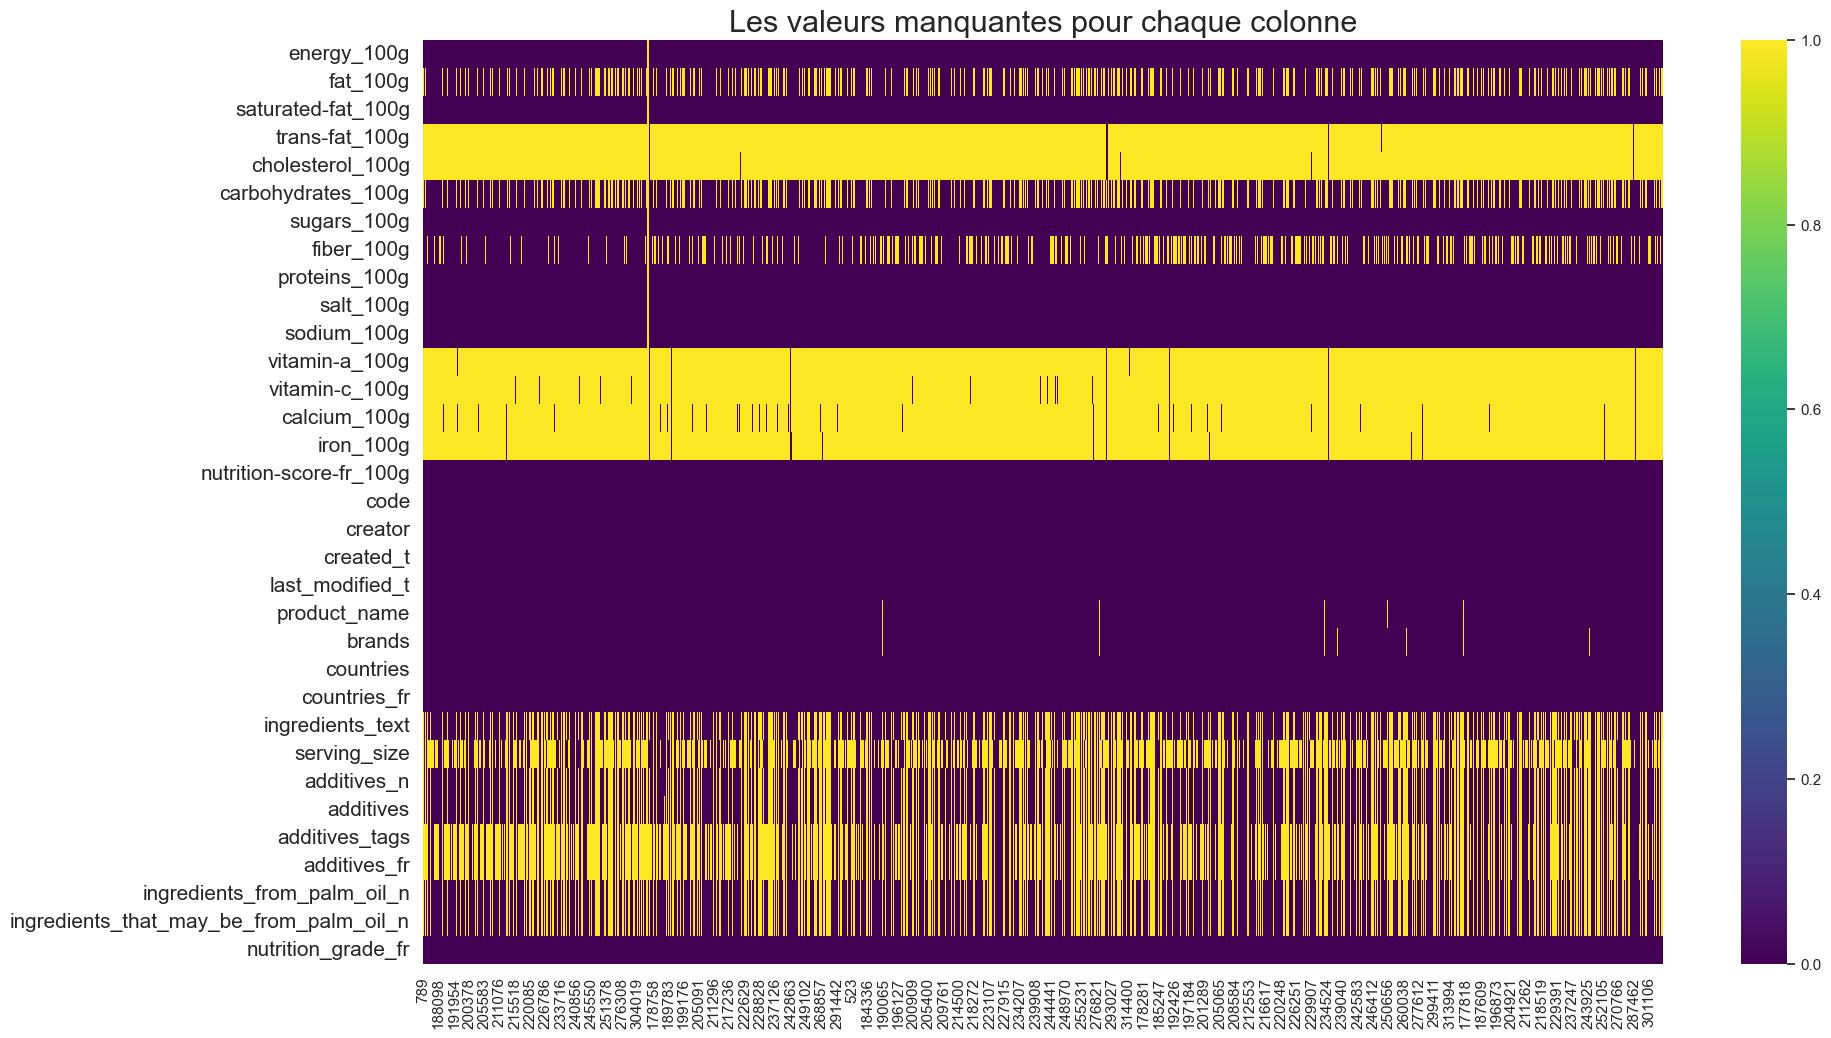

In [95]:
#Voir les valeurs manquantes pour chaque colonne
display(df.isnull().sum())
plt.figure(figsize=(20,12))
plt.title('Les valeurs manquantes pour chaque colonne', size=22)
sns.heatmap(df.isnull().transpose(),cmap='viridis')
plt.yticks(fontsize=15);

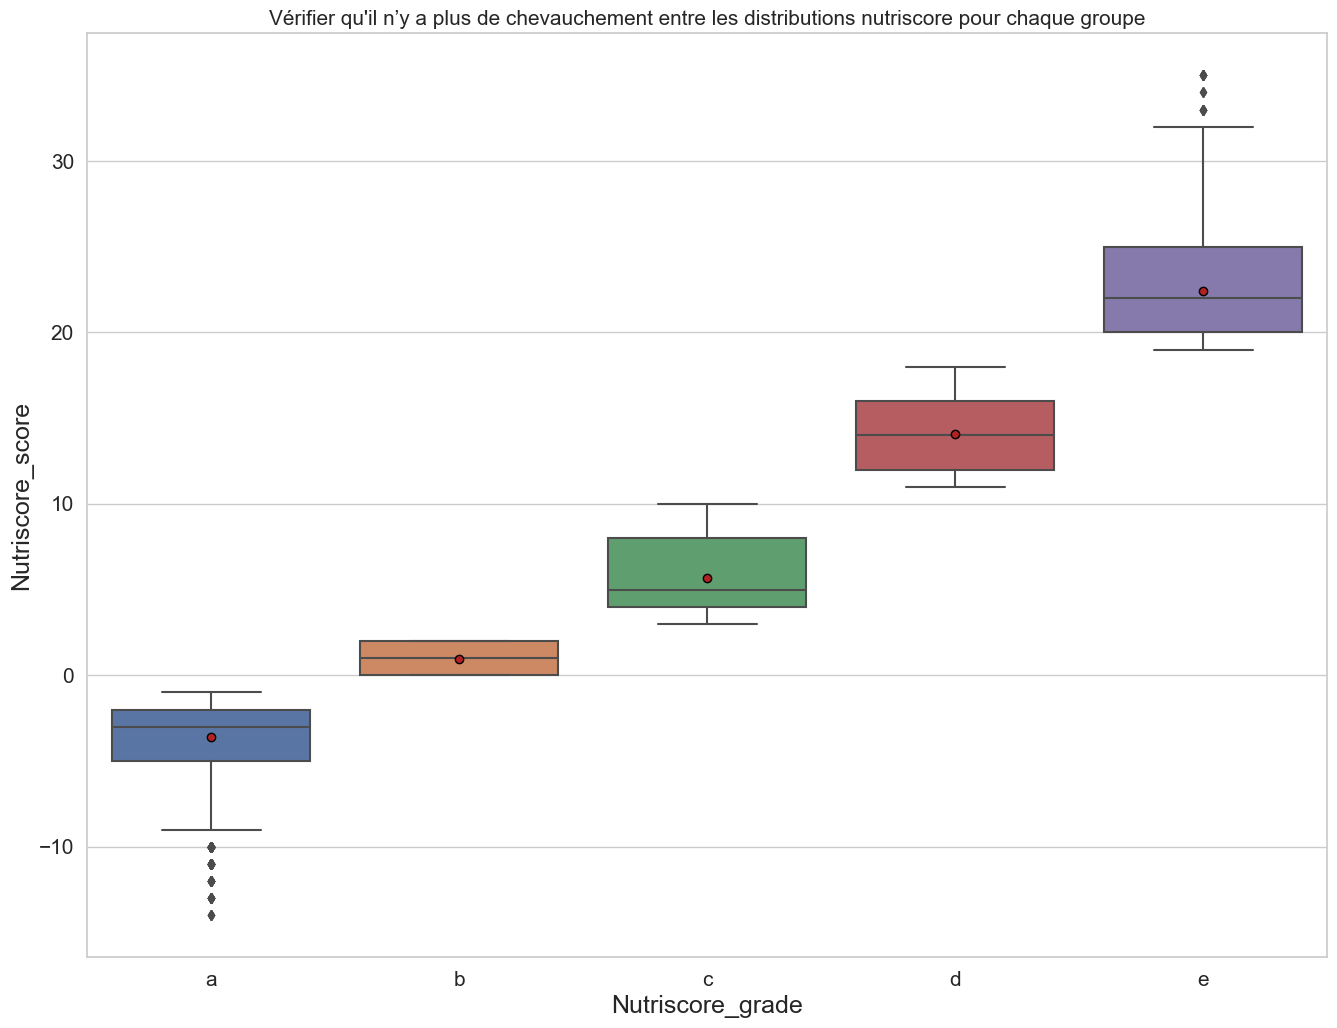

In [96]:
#Vérifier qu'il n’y a plus de chevauchement entre les distributions nutriscore pour chaque groupe avec boxplot
meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}
plt.figure(figsize=(16,12))
plt.title("Vérifier qu'il n’y a plus de chevauchement entre les distributions nutriscore pour chaque groupe", size=15)
sns.boxplot(x=df['nutrition_grade_fr'], y=df['nutrition-score-fr_100g'],  showmeans=True, meanprops=meanprops,data=df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Nutriscore_grade', fontsize=18)
plt.ylabel('Nutriscore_score', fontsize=18)
plt.show()

<Figure size 1800x1400 with 0 Axes>

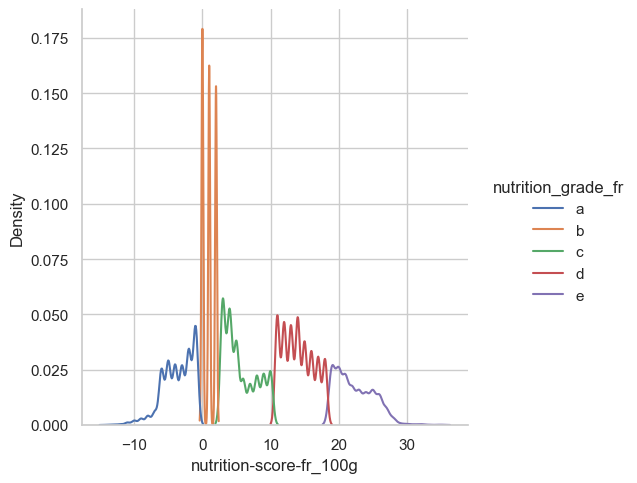

In [97]:
# afficher les distributions KDE des groupes nutriscore_grade
plt.figure(figsize=(18,14))
sns.displot(data=df, x="nutrition-score-fr_100g", hue="nutrition_grade_fr", kind='kde')

In [98]:
# Voir les valeurs extremes pour les nutriscores_scores (les groupes ne sont pas bien définis)
df.groupby('nutrition_grade_fr')[['nutrition-score-fr_100g']].agg([min,max,np.mean, len])

nutrition-score-fr_100g                        
                                       min   max       mean    len
nutrition_grade_fr                                                
a                  -14.0                   -1.0  -3.628181   9432 
b                   0.0                     2.0   0.947545   8655 
c                   3.0                     10.0  5.665088   11821
d                   11.0                    18.0  14.090969  13763
e                   19.0                    35.0  22.392499  8586

<a id='14'></a>

### 1.11 Traitement des valeurs manquantes

[Haut de page](#sommaire)

Pour l'imputation des valeurs manquantes. J'ai essayé plusieurs méthodes comme sorte d'excercices :
* SimpleImputer : qui remplace toute valeur manquante par une statistique ou une constante donnée
* KNNImputer : un algorithme qui remplace les valeurs manquantes d'un échantillon par les valeurs de ses plus proches voisin.J'ai essayé cet alogorithme  pour l'ensemble des données mais ca appris enormement de temps sans que cela ne marche car c'est un algorthime qui consomme  beaucoup de ressources (pour un point donné il doit chercher tous les voisins les plus proches) donc j'ai finis par l'appliquer sur un échantillon de 5000.
* IterativeImputer : Cette forme d'imputation utilise les méthodes de la régression linéarire multiple pour imputer les valeurs. Dans l'imputation par régression une colone avec des valeurs manquantes est considérée comme la sortie y et les autres colones comme les entrées Xi.
* Interpolate : Cette méthode est utilisé pour des variables continues. L'interpolation consiste à compléter une valeur par la valeur précédante la valeur suivante ou les deux en même temps. Une approche posssible pour les méthodes consiste à remplacer la valeur manquante par la moyenne de la valeur suivante et la valeur précédante. L'inconvenient est que vous pouvez interpoler uniquement les variables bien réparties.  


In [99]:
def impute_NaN_iterative(df): 
    numeric_columns= df.select_dtypes(['float64', 'int64', 'float32','float16'])
    colone= numeric_columns.columns
    no_numeric_columns= df.select_dtypes(exclude=['float64', 'int64', 'float32','float16'])
    no_numeric_columns.reset_index(drop=True,inplace=True)
    imputer = IterativeImputer()
    X= numeric_columns.values
    imputer.fit(X)
    X_trans= imputer.transform(X)
    numeric_columns= pd.DataFrame(X_trans , columns=colone)
    numeric_columns.reset_index(drop=True,inplace=True)
    df = pd.concat([numeric_columns, no_numeric_columns], axis= 1)
    df= df
    return df



def impute_Knn(df):
    df_sample = df.sampe(5000)
    X= df_sample.select_dtypes(['float64', 'int64','float16'])
    for col in X.columns: 
        df_sample.drop(columns=[col], inplace=True)
    imputer = KNNImputer(n_neighbors=3)
    imputed = imputer.fit_transform(X)
    df_imputed = pd.DataFrame(imputed, columns=X.columns)
    df= pd.concat([df_sample,df_imputed],axis=1)
    return df


def Impute_NaN_interpolate(df) :
    for col in df.select_dtypes(['float64', 'int64', 'float32','float16']):
        df[col].interpolate(method='linear', inplace=True)
    return df


def Simple_Imputer(df): 
    numeric_columns= df.select_dtypes(['float64', 'int64', 'float32','float16'])
    Impute = SimpleImputer(missing_values=np.nan, strategy='mean')
    for col in numeric_columns: 
        Imput = Impute.fit(df[[col]])
        df[[col]]= Impute.transform(df[[col]])
    return df

In [100]:
df= Impute_NaN_interpolate(df)

energy_100g                                0    
fat_100g                                   0    
saturated-fat_100g                         0    
trans-fat_100g                             173  
cholesterol_100g                           93   
carbohydrates_100g                         0    
sugars_100g                                0    
fiber_100g                                 0    
proteins_100g                              0    
salt_100g                                  0    
sodium_100g                                0    
vitamin-a_100g                             93   
vitamin-c_100g                             17   
calcium_100g                               93   
iron_100g                                  73   
nutrition-score-fr_100g                    0    
code                                       0    
creator                                    0    
created_t                                  0    
last_modified_t                            0    
product_name        

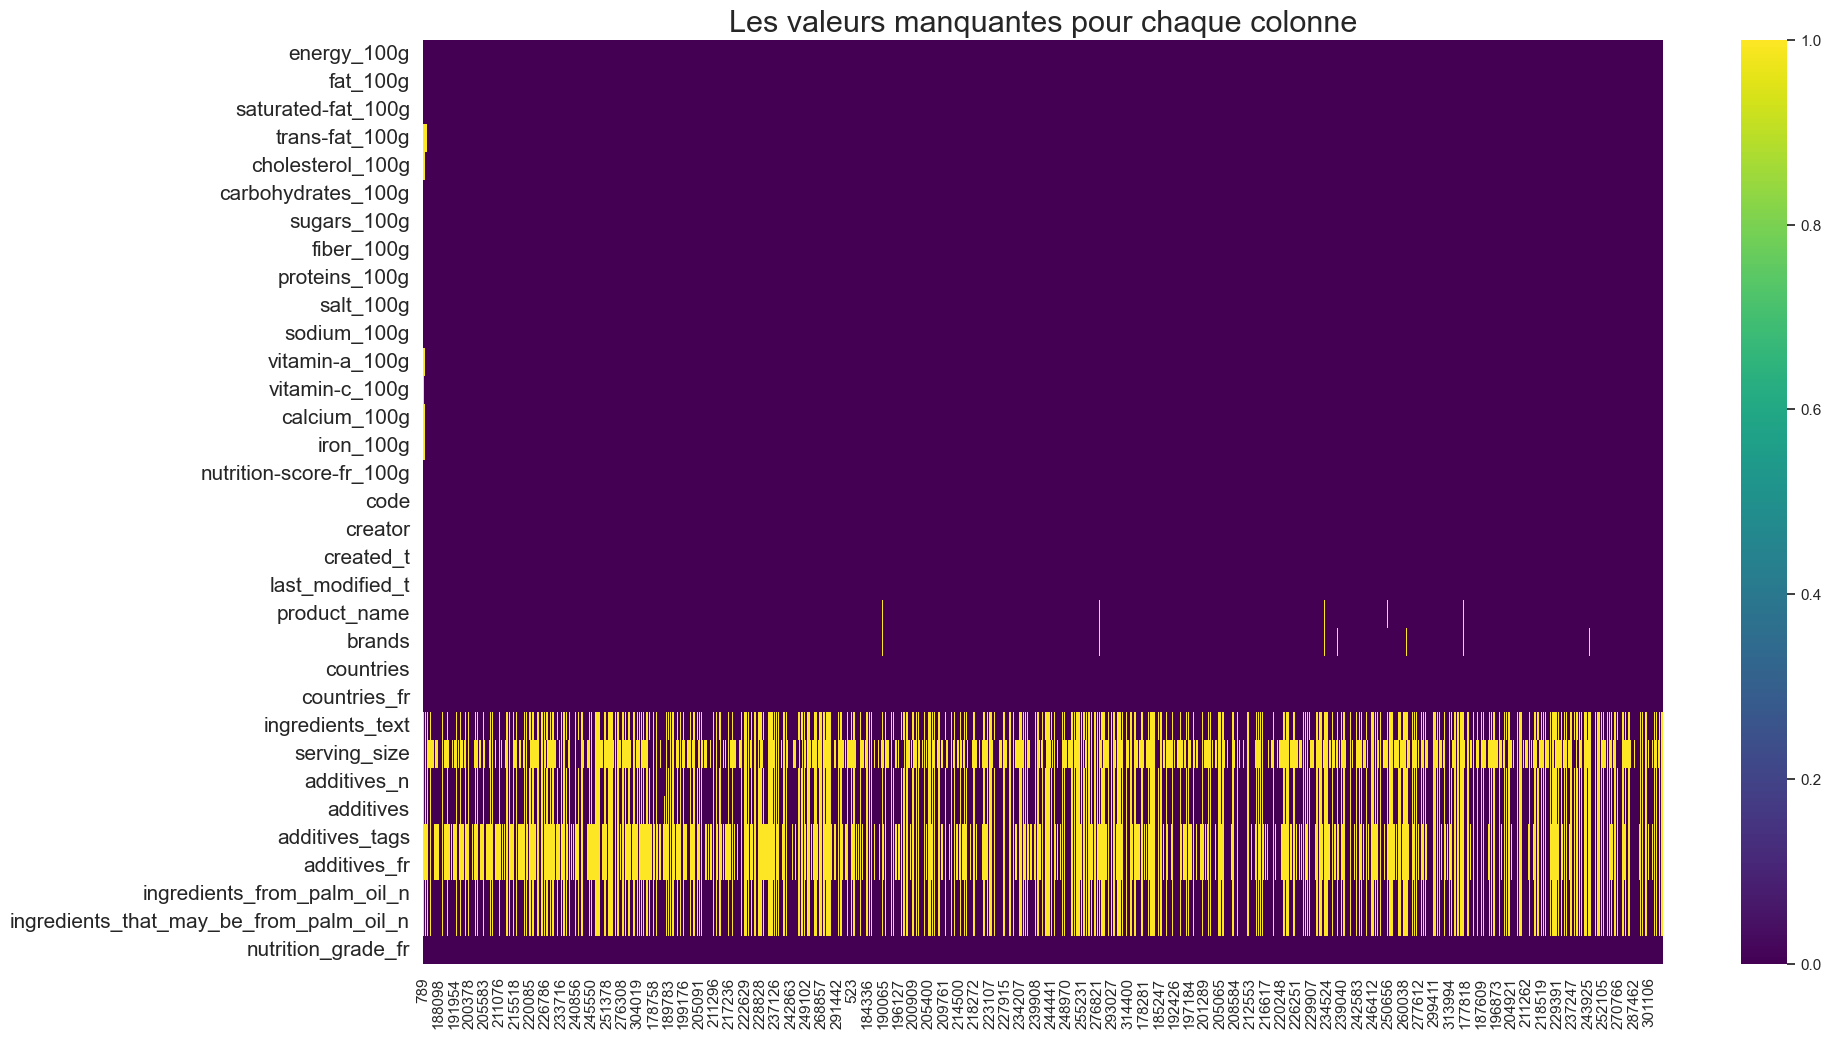

In [101]:
#Voir les valeurs manquantes pour chaque colonne
display(df.isnull().sum())
plt.figure(figsize=(20,12))
plt.title('Les valeurs manquantes pour chaque colonne', size=22)
sns.heatmap(df.isnull().transpose(),cmap='viridis')
plt.yticks(fontsize=15);

<a id='p3'></a>

<a id='p3'></a>

## <div style='background-color: #aac1cb ; padding: 5px; border: 2px solid black;'> 2. Automatisation du processus de nettoyage </div>  



[Haut de page](#sommaire)

**Pour l'automatisation du processus de nettoyage. Un fichier.py  a été crée dans le même dossier (P3_DS_Toolbox.py) contenant toutes les fonctions de nettoyage. et la fonction ci-dessous total_clean() qui appel ces fonctions avec la gestion d'exception (try except)**

In [102]:
def total_clean(df): 
    print('Le nettoyage Globale de la df .....')
    print('-'*60)
    print(nombre_percentage_nan(df))
    print('La dimension de la df : ' , df.shape)

    print('-'*60) 
    
    print('-'*60)
    print('Nettoyage des colones avec plus de 65 % des NaN')
    try : 
        df= delete_nan(df, 65)
    except Exception as e :
        print(e)
        print('Réduction des colones de la df est échoué ')
    
    print('-'*60)
    print('Mise en conformité du format de la date')
    try : 
        del_inx = df['created_datetime'].sort_values().tail(24).index
        df.drop(del_inx, axis = 0, inplace = True)
        df = convet_datetime(df)
    except Exception as e:
        print(e)
        print('Erreur dans la mise en conformité des dates')
    
        
    print('-'*60)
    print('Suppression des colones non pertinents')
    try : 
        df = delete_non_relevant_column(df)
    except Exception as e  :
        print(e)
        print('Suppression des colones non pertinents a échoué')
        
    print('-'*60)
    print('Conversion des colones objet en category')
    try : 
        df= convert_to_category(df)
    except Exception as e :
        print(e)
        print("La conversion au type 'category' a échoué")
        
    print('-'*60)
    print('Réduction de la dataset ')
    try : 
        df= choix_pays(df)
    except Exception as e : 
        print(e)
        print('La réduction de la df  a échoué')
        
        
    print('-'*60)
    print('Suppression des colones redondants:')
    try : 
        df = remove_columns(df)
    except Exception as e : 
        print(e)
        print("La suppression des colones redondants a échoué")
    
    print('-'*60)
    print('Traitement des valeurs négatives')
    try : 
        df = negative_values(df)
    except Exception as e :
        print(e)
        print('Le traitement des valeurs négatifs a échoué ') 
        
        
    print('-'*60)
    print('Traitement des colones 100_g')
    try : 
        df = column_100g(df)
    except Exception as e :
        print(e)
        print('Le traitement des colones 100_g a échoué') 
        
        
        
    print('-'*60)
    print('Traitement des outliers')
    try : 
        df = treat_outliers_std(df)
    except Exception as e :
        print(e)
        print('Le traitement des outliers a échoué ')
         
        
    print('-'*60)
    print('Imputation des NaN')
    try : 
        df= impute_NaN_iterative(df)
    except  Exception as e:
        print(e)
        print("L'imputation des NaN a échoué")
    
    print('-'*60)
    print('-'*60)
    print('le pourcentage actuel des NaN dans la df' , nombre_percentage_nan(df))
    print('La dimension de la df : ' , df.shape)   
    return df 

In [103]:
%%time
df_auto = total_clean(df_auto)

Le nettoyage Globale de la df .....
------------------------------------------------------------
Nombre total des NaN: 39608589
Percentage total des NaN: 76.22
None
La dimension de la df :  (320772, 162)
------------------------------------------------------------
------------------------------------------------------------
Nettoyage des colones avec plus de 65 % des NaN
------------------------------------------------------------
Mise en conformité du format de la date
------------------------------------------------------------
Suppression des colones non pertinents
------------------------------------------------------------
Conversion des colones objet en category
------------------------------------------------------------
Réduction de la dataset 
------------------------------------------------------------
Suppression des colones redondants:
------------------------------------------------------------
Traitement des valeurs négatives
----------------------------------------------

<a id='p4'></a>

## <div style='background-color: #aac1cb ; padding: 5px; border: 2px solid black;'> 3. Sauvegarde de la df en fichier CSV </div>  


[Haut de page](#sommaire)

In [104]:
df.to_csv('data_clean_principal.csv' , index=False)
res = df.dtypes.to_frame('dtypes').reset_index()
types = res.to_csv('dtypes.csv', index=False)

In [105]:
df.select_dtypes(['float64']).describe().T

count         mean         std   min         25%  \
energy_100g              52257.0  1099.414925  730.791129  0.0   460.000000   
fat_100g                 52257.0  12.542185    12.626203   0.0   2.100000     
saturated-fat_100g       52257.0  4.997877     6.383577    0.0   0.400000     
trans-fat_100g           52084.0  0.210535     0.291604    0.0   0.003266     
cholesterol_100g         52164.0  0.015867     0.026868    0.0   0.000000     
carbohydrates_100g       52257.0  28.399171    25.622661   0.0   5.100000     
sugars_100g              52257.0  12.149225    16.596080   0.0   1.000000     
fiber_100g               52257.0  1.990206     2.569371    0.0   0.000000     
proteins_100g            52257.0  7.969213     6.887814    0.0   2.800000     
salt_100g                52257.0  0.903961     1.160080    0.0   0.100000     
sodium_100g              52257.0  0.355890     0.456725    0.0   0.039370     
vitamin-a_100g           52164.0  0.000284     0.000210    0.0   0.000124     
vitamin-c_100g           52240.0  0.033699     0.142915    0.0   0.012803     
calcium_100g             52164.0  0.291947     0.239434    0.0   0.121585     
iron_100g                52184.0  0.019620     0.139763    0.0   0.003293     
nutrition-score-fr_100g  52257.0  8.173891     9.085240   -14.0  1.000000     

                                 50%          75%          max  
energy_100g              1021.000000  1632.000000  9983.000000  
fat_100g                 7.900000     21.000000    63.900000    
saturated-fat_100g       2.100000     7.400000     30.800000    
trans-fat_100g           0.074170     0.301361     1.000000     
cholesterol_100g         0.002430     0.017855     0.175000     
carbohydrates_100g       18.500000    52.000000    100.000000   
sugars_100g              3.700000     17.000000    70.200000    
fiber_100g               1.136667     2.900000     16.100000    
proteins_100g            6.300000     11.000000    31.400000    
salt_100g                0.640000     1.280000     13.600000    
sodium_100g              0.251969     0.503937     5.354331     
vitamin-a_100g           0.000236     0.000414     0.001381     
vitamin-c_100g           0.023824     0.041853     7.500000     
calcium_100g             0.186704     0.378289     1.534000     
iron_100g                0.005512     0.007521     2.400000     
nutrition-score-fr_100g  7.000000     15.000000    35.000000